In [1]:
# Path hack.
import sys, os
# sys.path.insert(0, os.path.abspath('..'))
sys.path.append(os.path.abspath('..') + "\\FEDEx\\")

import numpy as np
import time
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN

In [2]:
from UserStudyInteractive import filter_

usetex-True


In [3]:
flights = pd.read_csv(os.path.abspath('') + "\\datasets\\flights_sampled.csv")

In [4]:
flights_embeddings = pd.read_csv(os.path.abspath('') + "\\datasets\\flights_sampled_embedding.csv")

In [5]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY']]

In [117]:
clusters = KMeans(n_clusters=15, random_state=0).fit_predict(flights_embeddings)

In [119]:
clustered_flights = flights.join(pd.DataFrame(data=clusters, columns=['cluster']))

In [79]:
clustered_flights.dropna()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
0,2015,7,23,4,DL,2197,N997DL,CMH,ATL,600,555.0,-5.0,14.0,609.0,91.0,82.0,64.0,447,713.0,4.0,731,717.0,-14.0,0
1,2015,2,15,7,OO,4760,N629BR,SLC,GTF,2002,1955.0,-7.0,26.0,2021.0,100.0,105.0,76.0,463,2137.0,3.0,2142,2140.0,-2.0,2
2,2015,2,26,4,UA,12,N57869,BOS,SFO,800,806.0,6.0,9.0,815.0,410.0,374.0,356.0,2704,1111.0,9.0,1150,1120.0,-30.0,1
3,2015,2,11,3,UA,1578,N37409,IAH,BOS,1559,1624.0,25.0,13.0,1637.0,218.0,203.0,178.0,1597,2035.0,12.0,2037,2047.0,10.0,3
4,2015,8,24,1,MQ,3381,N694MQ,MOB,DFW,1910,1922.0,12.0,8.0,1930.0,110.0,107.0,83.0,539,2053.0,16.0,2100,2109.0,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2015,10,19,1,MQ,3143,N519MQ,13930,11042,1743,1744.0,1.0,28.0,1812.0,80.0,83.0,48.0,316,2000.0,7.0,2003,2007.0,4.0,6
49996,2015,4,21,2,WN,255,N254WN,DAL,MCI,1410,1408.0,-2.0,18.0,1426.0,85.0,101.0,79.0,460,1545.0,4.0,1535,1549.0,14.0,4
49997,2015,3,5,4,EV,4096,N11551,ORD,CHS,1340,1339.0,-1.0,18.0,1357.0,132.0,133.0,109.0,760,1646.0,6.0,1652,1652.0,0.0,7
49998,2015,12,14,1,DL,1939,N353NB,PIT,ATL,1510,1505.0,-5.0,8.0,1513.0,115.0,103.0,86.0,526,1639.0,9.0,1705,1648.0,-17.0,4


# Explaining the embedding

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
0,0,2015,7,23,4,DL,2197,N997DL,CMH,ATL,600,555.0,-5.0,14.0,609.0,91.0,82.0,64.0,447,713.0,4.0,731,717.0,-14.0,0
28,29,2015,4,20,1,DL,2531,N686DA,SLC,ATL,700,652.0,-8.0,14.0,706.0,212.0,200.0,181.0,1590,1207.0,5.0,1232,1212.0,-20.0,0
34,35,2015,3,30,1,B6,28,N629JB,MCO,EWR,905,901.0,-4.0,14.0,915.0,155.0,142.0,123.0,937,1118.0,5.0,1140,1123.0,-17.0,0
44,45,2015,8,8,6,MQ,3568,N693MQ,CVG,MIA,600,558.0,-2.0,13.0,611.0,155.0,138.0,120.0,948,811.0,5.0,835,816.0,-19.0,0
47,48,2015,8,21,5,EV,5910,N48901,BHM,ORD,916,926.0,10.0,11.0,937.0,128.0,111.0,93.0,584,1110.0,7.0,1124,1117.0,-7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49074,49981,2015,12,16,3,AA,347,N3KTAA,MSY,MIA,600,556.0,-4.0,19.0,615.0,111.0,118.0,90.0,675,845.0,9.0,851,854.0,3.0,0
49079,49986,2015,5,14,4,EV,4691,N16541,DAY,EWR,1110,1054.0,-16.0,10.0,1104.0,107.0,103.0,85.0,533,1229.0,8.0,1257,1237.0,-20.0,0
49080,49987,2015,12,24,4,AA,1620,N581AA,DFW,DEN,905,902.0,-3.0,25.0,927.0,129.0,130.0,98.0,641,1005.0,7.0,1014,1012.0,-2.0,0
49087,49994,2015,1,18,7,AA,1367,N578AA,TPA,DFW,853,850.0,-3.0,26.0,916.0,172.0,182.0,150.0,929,1046.0,6.0,1045,1052.0,7.0,0


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
0,0,2015,7,23,4,DL,2197,N997DL,CMH,ATL,600,555.0,-5.0,14.0,609.0,91.0,82.0,64.0,447,713.0,4.0,731,717.0,-14.0,0
28,29,2015,4,20,1,DL,2531,N686DA,SLC,ATL,700,652.0,-8.0,14.0,706.0,212.0,200.0,181.0,1590,1207.0,5.0,1232,1212.0,-20.0,0
34,35,2015,3,30,1,B6,28,N629JB,MCO,EWR,905,901.0,-4.0,14.0,915.0,155.0,142.0,123.0,937,1118.0,5.0,1140,1123.0,-17.0,0
44,45,2015,8,8,6,MQ,3568,N693MQ,CVG,MIA,600,558.0,-2.0,13.0,611.0,155.0,138.0,120.0,948,811.0,5.0,835,816.0,-19.0,0
47,48,2015,8,21,5,EV,5910,N48901,BHM,ORD,916,926.0,10.0,11.0,937.0,128.0,111.0,93.0,584,1110.0,7.0,1124,1117.0,-7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49074,49981,2015,12,16,3,AA,347,N3KTAA,MSY,MIA,600,556.0,-4.0,19.0,615.0,111.0,118.0,90.0,675,845.0,9.0,851,854.0,3.0,0
49079,49986,2015,5,14,4,EV,4691,N16541,DAY,EWR,1110,1054.0,-16.0,10.0,1104.0,107.0,103.0,85.0,533,1229.0,8.0,1257,1237.0,-20.0,0
49080,49987,2015,12,24,4,AA,1620,N581AA,DFW,DEN,905,902.0,-3.0,25.0,927.0,129.0,130.0,98.0,641,1005.0,7.0,1014,1012.0,-2.0,0
49087,49994,2015,1,18,7,AA,1367,N578AA,TPA,DFW,853,850.0,-3.0,26.0,916.0,172.0,182.0,150.0,929,1046.0,6.0,1045,1052.0,7.0,0


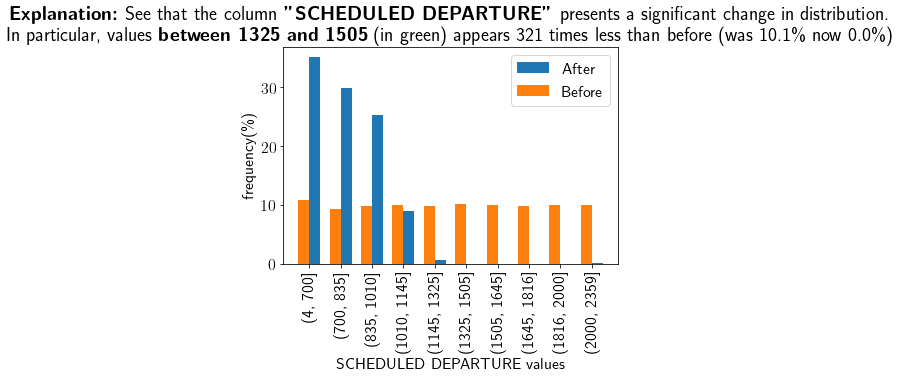

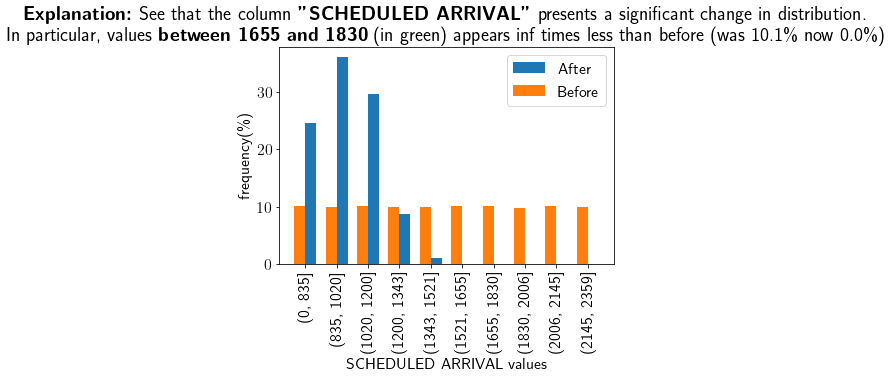

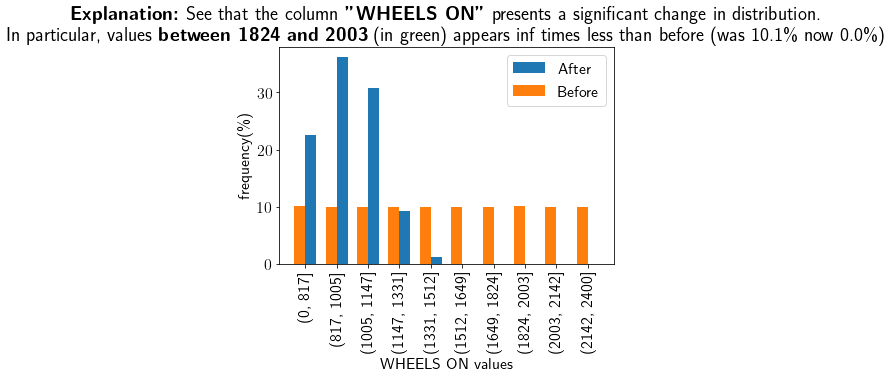

In [108]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 0, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
2,2,2015,2,26,4,UA,12,N57869,BOS,SFO,800,806.0,6.0,9.0,815.0,410.0,374.0,356.0,2704,1111.0,9.0,1150,1120.0,-30.0,1
7,7,2015,5,7,4,VX,415,N639VA,JFK,LAX,2010,2006.0,-4.0,44.0,2050.0,380.0,404.0,335.0,2475,2325.0,25.0,2330,2350.0,20.0,1
14,14,2015,2,9,1,UA,1545,N26226,DFW,IAH,530,523.0,-7.0,10.0,533.0,68.0,56.0,40.0,224,613.0,6.0,638,619.0,-19.0,1
19,19,2015,10,19,1,UA,541,N587UA,12478,14771,835,837.0,2.0,18.0,855.0,377.0,372.0,334.0,2586,1129.0,20.0,1152,1149.0,-3.0,1
25,26,2015,11,26,4,HA,20,N588HA,HNL,SMF,1430,1511.0,41.0,19.0,1530.0,320.0,310.0,285.0,2462,2215.0,6.0,2150,2221.0,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49047,49952,2015,12,1,2,DL,41,N191DN,JFK,LAX,1815,1808.0,-7.0,23.0,1831.0,395.0,360.0,326.0,2475,2057.0,11.0,2150,2108.0,-42.0,1
49060,49966,2015,9,28,1,UA,1922,N18119,SFO,EWR,725,721.0,-4.0,17.0,738.0,340.0,321.0,294.0,2565,1532.0,10.0,1605,1542.0,-23.0,1
49069,49976,2015,9,1,2,AS,121,N768AS,SEA,ANC,2355,20.0,25.0,12.0,32.0,213.0,210.0,194.0,1448,246.0,4.0,228,250.0,22.0,1
49078,49985,2015,6,3,3,DL,419,N713TW,JFK,SEA,1605,1621.0,16.0,28.0,1649.0,379.0,347.0,313.0,2422,1902.0,6.0,1924,1908.0,-16.0,1


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
2,2,2015,2,26,4,UA,12,N57869,BOS,SFO,800,806.0,6.0,9.0,815.0,410.0,374.0,356.0,2704,1111.0,9.0,1150,1120.0,-30.0,1
7,7,2015,5,7,4,VX,415,N639VA,JFK,LAX,2010,2006.0,-4.0,44.0,2050.0,380.0,404.0,335.0,2475,2325.0,25.0,2330,2350.0,20.0,1
14,14,2015,2,9,1,UA,1545,N26226,DFW,IAH,530,523.0,-7.0,10.0,533.0,68.0,56.0,40.0,224,613.0,6.0,638,619.0,-19.0,1
19,19,2015,10,19,1,UA,541,N587UA,12478,14771,835,837.0,2.0,18.0,855.0,377.0,372.0,334.0,2586,1129.0,20.0,1152,1149.0,-3.0,1
25,26,2015,11,26,4,HA,20,N588HA,HNL,SMF,1430,1511.0,41.0,19.0,1530.0,320.0,310.0,285.0,2462,2215.0,6.0,2150,2221.0,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49047,49952,2015,12,1,2,DL,41,N191DN,JFK,LAX,1815,1808.0,-7.0,23.0,1831.0,395.0,360.0,326.0,2475,2057.0,11.0,2150,2108.0,-42.0,1
49060,49966,2015,9,28,1,UA,1922,N18119,SFO,EWR,725,721.0,-4.0,17.0,738.0,340.0,321.0,294.0,2565,1532.0,10.0,1605,1542.0,-23.0,1
49069,49976,2015,9,1,2,AS,121,N768AS,SEA,ANC,2355,20.0,25.0,12.0,32.0,213.0,210.0,194.0,1448,246.0,4.0,228,250.0,22.0,1
49078,49985,2015,6,3,3,DL,419,N713TW,JFK,SEA,1605,1621.0,16.0,28.0,1649.0,379.0,347.0,313.0,2422,1902.0,6.0,1924,1908.0,-16.0,1


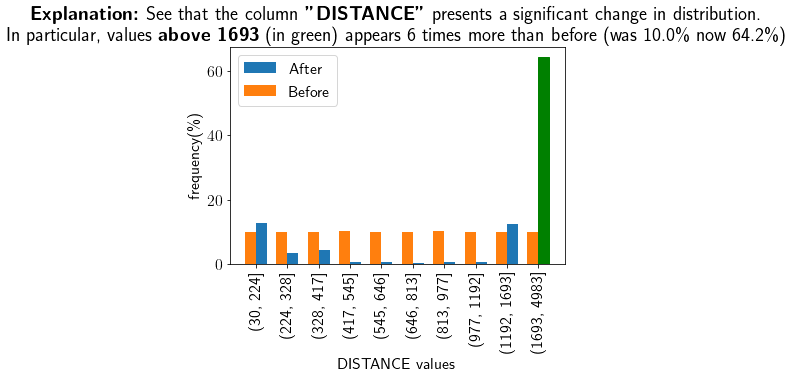

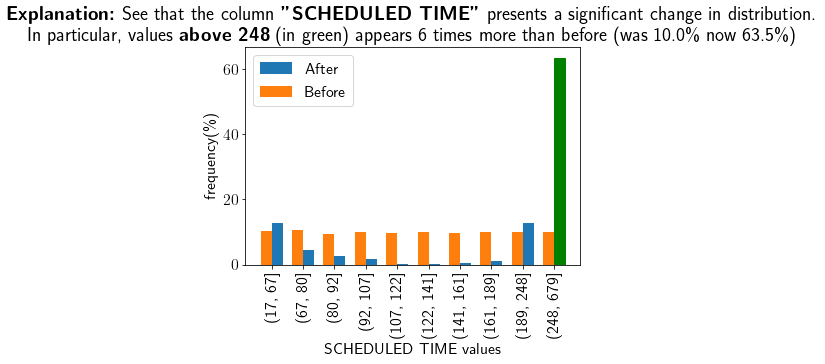

In [109]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 1, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
1,1,2015,2,15,7,OO,4760,N629BR,SLC,GTF,2002,1955.0,-7.0,26.0,2021.0,100.0,105.0,76.0,463,2137.0,3.0,2142,2140.0,-2.0,2
9,9,2015,12,17,4,WN,1839,N784SW,MCO,ALB,2055,2117.0,22.0,10.0,2127.0,160.0,138.0,125.0,1073,2332.0,3.0,2335,2335.0,0.0,2
10,10,2015,9,13,7,WN,238,N493WN,LAX,LAS,2015,2023.0,8.0,15.0,2038.0,60.0,66.0,45.0,236,2123.0,6.0,2115,2129.0,14.0,2
18,18,2015,8,19,3,WN,434,N8627B,DCA,AUS,1745,1740.0,-5.0,16.0,1756.0,210.0,204.0,183.0,1315,1959.0,5.0,2015,2004.0,-11.0,2
50,51,2015,12,9,3,UA,381,N454UA,DEN,OMA,2007,2004.0,-3.0,10.0,2014.0,81.0,70.0,57.0,472,2211.0,3.0,2228,2214.0,-14.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49035,49940,2015,8,27,4,WN,2075,N8634A,OKC,DEN,2000,2001.0,1.0,9.0,2010.0,95.0,98.0,83.0,495,2033.0,6.0,2035,2039.0,4.0,2
49039,49944,2015,9,4,5,WN,1681,N691WN,ATL,OKC,2040,2102.0,22.0,27.0,2129.0,135.0,134.0,103.0,761,2212.0,4.0,2155,2216.0,21.0,2
49062,49968,2015,3,16,1,WN,2962,N7718B,BWI,FLL,2155,2150.0,-5.0,11.0,2201.0,155.0,132.0,116.0,925,2357.0,5.0,30,2.0,-28.0,2
49075,49982,2015,11,28,6,OO,4772,N807SK,SLC,OMA,2010,2102.0,52.0,32.0,2134.0,126.0,136.0,100.0,840,14.0,4.0,2316,18.0,62.0,2


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
1,1,2015,2,15,7,OO,4760,N629BR,SLC,GTF,2002,1955.0,-7.0,26.0,2021.0,100.0,105.0,76.0,463,2137.0,3.0,2142,2140.0,-2.0,2
9,9,2015,12,17,4,WN,1839,N784SW,MCO,ALB,2055,2117.0,22.0,10.0,2127.0,160.0,138.0,125.0,1073,2332.0,3.0,2335,2335.0,0.0,2
10,10,2015,9,13,7,WN,238,N493WN,LAX,LAS,2015,2023.0,8.0,15.0,2038.0,60.0,66.0,45.0,236,2123.0,6.0,2115,2129.0,14.0,2
18,18,2015,8,19,3,WN,434,N8627B,DCA,AUS,1745,1740.0,-5.0,16.0,1756.0,210.0,204.0,183.0,1315,1959.0,5.0,2015,2004.0,-11.0,2
50,51,2015,12,9,3,UA,381,N454UA,DEN,OMA,2007,2004.0,-3.0,10.0,2014.0,81.0,70.0,57.0,472,2211.0,3.0,2228,2214.0,-14.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49035,49940,2015,8,27,4,WN,2075,N8634A,OKC,DEN,2000,2001.0,1.0,9.0,2010.0,95.0,98.0,83.0,495,2033.0,6.0,2035,2039.0,4.0,2
49039,49944,2015,9,4,5,WN,1681,N691WN,ATL,OKC,2040,2102.0,22.0,27.0,2129.0,135.0,134.0,103.0,761,2212.0,4.0,2155,2216.0,21.0,2
49062,49968,2015,3,16,1,WN,2962,N7718B,BWI,FLL,2155,2150.0,-5.0,11.0,2201.0,155.0,132.0,116.0,925,2357.0,5.0,30,2.0,-28.0,2
49075,49982,2015,11,28,6,OO,4772,N807SK,SLC,OMA,2010,2102.0,52.0,32.0,2134.0,126.0,136.0,100.0,840,14.0,4.0,2316,18.0,62.0,2


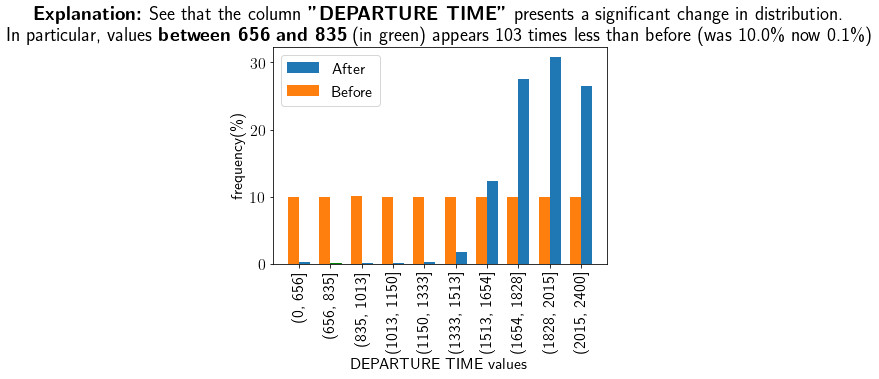

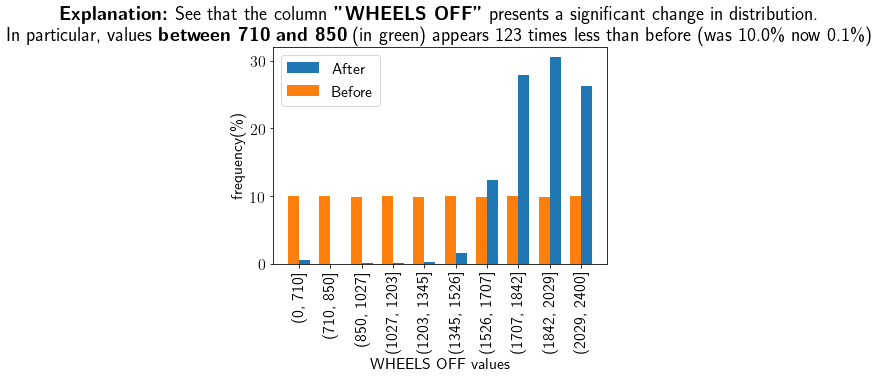

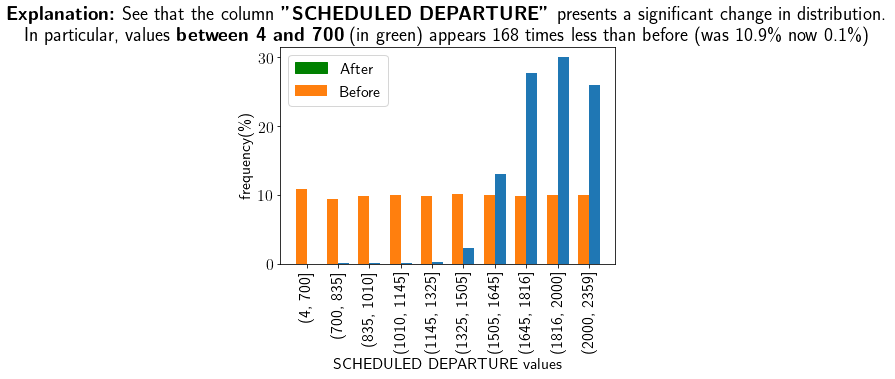

In [110]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 2, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
3,3,2015,2,11,3,UA,1578,N37409,IAH,BOS,1559,1624.0,25.0,13.0,1637.0,218.0,203.0,178.0,1597,2035.0,12.0,2037,2047.0,10.0,3
15,15,2015,2,25,3,F9,1275,N204FR,PHL,MIA,1650,1706.0,16.0,13.0,1719.0,175.0,167.0,148.0,1013,1947.0,6.0,1945,1953.0,8.0,3
16,16,2015,11,11,3,AA,1773,N704US,PHL,FLL,1145,1214.0,29.0,11.0,1225.0,173.0,140.0,126.0,992,1431.0,3.0,1438,1434.0,-4.0,3
35,36,2015,1,30,5,AA,1271,N3BTAA,SNA,DFW,1217,1225.0,8.0,13.0,1238.0,168.0,176.0,147.0,1205,1705.0,16.0,1705,1721.0,16.0,3
41,42,2015,7,29,3,UA,461,N428UA,DEN,IAD,1252,1252.0,0.0,10.0,1302.0,206.0,180.0,165.0,1452,1747.0,5.0,1818,1752.0,-26.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49029,49934,2015,1,10,6,AA,1412,N631AA,DFW,MIA,1350,1429.0,39.0,14.0,1443.0,162.0,195.0,132.0,1121,1755.0,49.0,1732,1844.0,72.0,3
49042,49947,2015,10,3,6,UA,1605,N67812,12889,12266,1526,1522.0,-4.0,14.0,1536.0,184.0,171.0,153.0,1222,2009.0,4.0,2030,2013.0,-17.0,3
49046,49951,2015,2,9,1,DL,829,N368NB,BOS,MSP,1125,1132.0,7.0,52.0,1224.0,203.0,219.0,153.0,1124,1357.0,14.0,1348,1411.0,23.0,3
49054,49959,2015,4,14,2,NK,872,N606NK,OAK,ORD,850,843.0,-7.0,8.0,851.0,245.0,237.0,216.0,1836,1427.0,13.0,1455,1440.0,-15.0,3


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
3,3,2015,2,11,3,UA,1578,N37409,IAH,BOS,1559,1624.0,25.0,13.0,1637.0,218.0,203.0,178.0,1597,2035.0,12.0,2037,2047.0,10.0,3
15,15,2015,2,25,3,F9,1275,N204FR,PHL,MIA,1650,1706.0,16.0,13.0,1719.0,175.0,167.0,148.0,1013,1947.0,6.0,1945,1953.0,8.0,3
16,16,2015,11,11,3,AA,1773,N704US,PHL,FLL,1145,1214.0,29.0,11.0,1225.0,173.0,140.0,126.0,992,1431.0,3.0,1438,1434.0,-4.0,3
35,36,2015,1,30,5,AA,1271,N3BTAA,SNA,DFW,1217,1225.0,8.0,13.0,1238.0,168.0,176.0,147.0,1205,1705.0,16.0,1705,1721.0,16.0,3
41,42,2015,7,29,3,UA,461,N428UA,DEN,IAD,1252,1252.0,0.0,10.0,1302.0,206.0,180.0,165.0,1452,1747.0,5.0,1818,1752.0,-26.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49029,49934,2015,1,10,6,AA,1412,N631AA,DFW,MIA,1350,1429.0,39.0,14.0,1443.0,162.0,195.0,132.0,1121,1755.0,49.0,1732,1844.0,72.0,3
49042,49947,2015,10,3,6,UA,1605,N67812,12889,12266,1526,1522.0,-4.0,14.0,1536.0,184.0,171.0,153.0,1222,2009.0,4.0,2030,2013.0,-17.0,3
49046,49951,2015,2,9,1,DL,829,N368NB,BOS,MSP,1125,1132.0,7.0,52.0,1224.0,203.0,219.0,153.0,1124,1357.0,14.0,1348,1411.0,23.0,3
49054,49959,2015,4,14,2,NK,872,N606NK,OAK,ORD,850,843.0,-7.0,8.0,851.0,245.0,237.0,216.0,1836,1427.0,13.0,1455,1440.0,-15.0,3


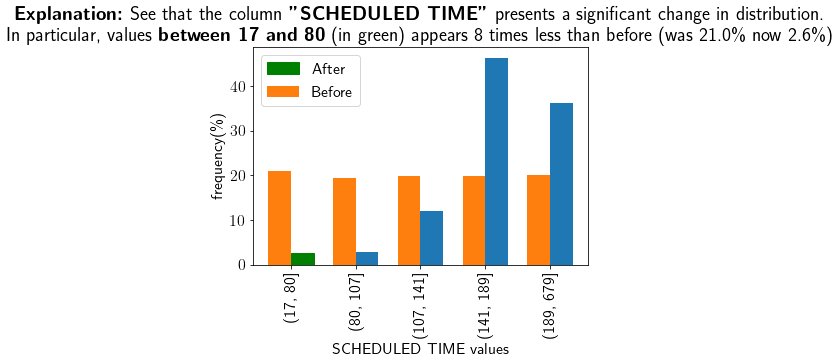

In [111]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 3, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
5,5,2015,9,27,7,DL,1612,N927AT,ATL,ORD,1345,1342.0,-3.0,14.0,1356.0,130.0,106.0,86.0,606,1422.0,6.0,1455,1428.0,-27.0,4
22,22,2015,5,10,7,WN,473,N563WN,DEN,SLC,1400,1400.0,0.0,12.0,1412.0,85.0,78.0,61.0,391,1513.0,5.0,1525,1518.0,-7.0,4
36,37,2015,11,20,5,WN,3015,N484WN,PHX,SLC,1555,1612.0,17.0,6.0,1618.0,90.0,84.0,75.0,507,1733.0,3.0,1725,1736.0,11.0,4
39,40,2015,10,5,1,DL,158,N975AT,11433,10721,1207,1203.0,-4.0,13.0,1216.0,118.0,109.0,89.0,632,1345.0,7.0,1405,1352.0,-13.0,4
46,47,2015,1,15,4,WN,4885,N967WN,PBI,ISP,1150,1201.0,11.0,20.0,1221.0,155.0,163.0,138.0,1052,1439.0,5.0,1425,1444.0,19.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49068,49975,2015,11,28,6,DL,2120,N608AT,MDW,ATL,1030,1027.0,-3.0,11.0,1038.0,113.0,100.0,84.0,591,1302.0,5.0,1323,1307.0,-16.0,4
49076,49983,2015,5,3,7,US,489,N749US,PHX,PIT,859,900.0,1.0,19.0,919.0,248.0,248.0,224.0,1814,1603.0,5.0,1607,1608.0,1.0,4
49083,49990,2015,10,31,6,WN,3538,N489WN,10800,14893,1345,1341.0,-4.0,10.0,1351.0,75.0,73.0,59.0,358,1450.0,4.0,1500,1454.0,-6.0,4
49089,49996,2015,4,21,2,WN,255,N254WN,DAL,MCI,1410,1408.0,-2.0,18.0,1426.0,85.0,101.0,79.0,460,1545.0,4.0,1535,1549.0,14.0,4


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
5,5,2015,9,27,7,DL,1612,N927AT,ATL,ORD,1345,1342.0,-3.0,14.0,1356.0,130.0,106.0,86.0,606,1422.0,6.0,1455,1428.0,-27.0,4
22,22,2015,5,10,7,WN,473,N563WN,DEN,SLC,1400,1400.0,0.0,12.0,1412.0,85.0,78.0,61.0,391,1513.0,5.0,1525,1518.0,-7.0,4
36,37,2015,11,20,5,WN,3015,N484WN,PHX,SLC,1555,1612.0,17.0,6.0,1618.0,90.0,84.0,75.0,507,1733.0,3.0,1725,1736.0,11.0,4
39,40,2015,10,5,1,DL,158,N975AT,11433,10721,1207,1203.0,-4.0,13.0,1216.0,118.0,109.0,89.0,632,1345.0,7.0,1405,1352.0,-13.0,4
46,47,2015,1,15,4,WN,4885,N967WN,PBI,ISP,1150,1201.0,11.0,20.0,1221.0,155.0,163.0,138.0,1052,1439.0,5.0,1425,1444.0,19.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49068,49975,2015,11,28,6,DL,2120,N608AT,MDW,ATL,1030,1027.0,-3.0,11.0,1038.0,113.0,100.0,84.0,591,1302.0,5.0,1323,1307.0,-16.0,4
49076,49983,2015,5,3,7,US,489,N749US,PHX,PIT,859,900.0,1.0,19.0,919.0,248.0,248.0,224.0,1814,1603.0,5.0,1607,1608.0,1.0,4
49083,49990,2015,10,31,6,WN,3538,N489WN,10800,14893,1345,1341.0,-4.0,10.0,1351.0,75.0,73.0,59.0,358,1450.0,4.0,1500,1454.0,-6.0,4
49089,49996,2015,4,21,2,WN,255,N254WN,DAL,MCI,1410,1408.0,-2.0,18.0,1426.0,85.0,101.0,79.0,460,1545.0,4.0,1535,1549.0,14.0,4


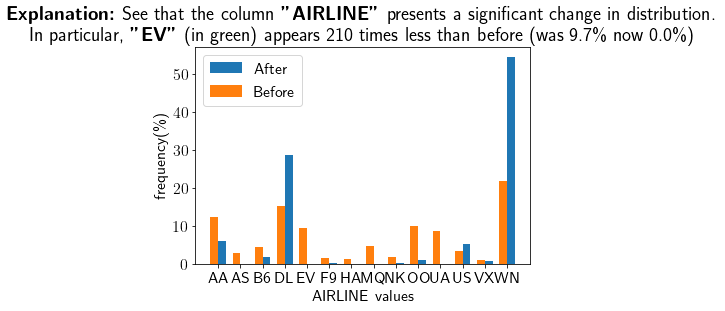

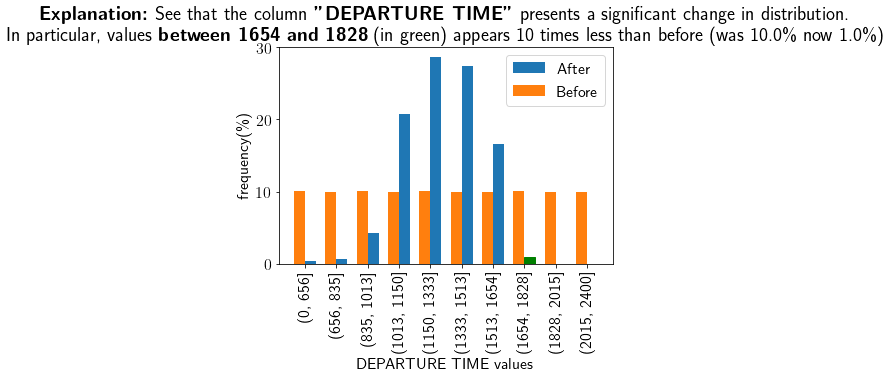

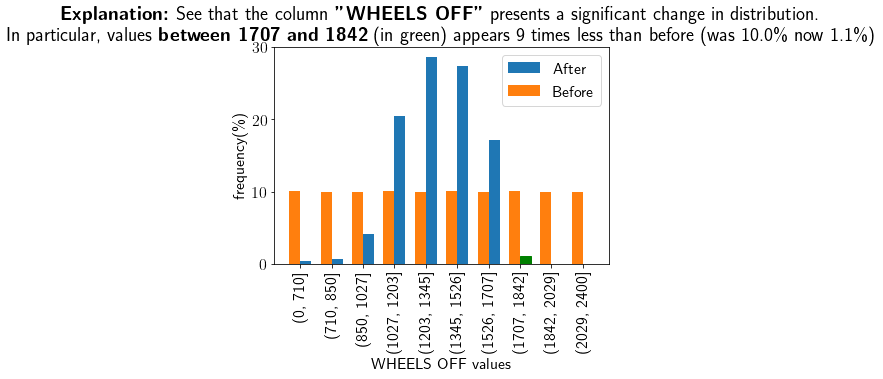

In [112]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 4, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
6,6,2015,11,12,4,DL,860,N346NB,SNA,MSP,645,640.0,-5.0,25.0,705.0,225.0,213.0,185.0,1522,1210.0,3.0,1230,1213.0,-17.0,5
11,11,2015,4,22,3,WN,142,N220WN,STL,DEN,1000,959.0,-1.0,7.0,1006.0,145.0,130.0,115.0,770,1101.0,8.0,1125,1109.0,-16.0,5
12,12,2015,1,15,4,OO,6416,N779SK,SFO,ABQ,1052,1042.0,-10.0,17.0,1059.0,139.0,140.0,118.0,896,1357.0,5.0,1411,1402.0,-9.0,5
23,23,2015,7,25,6,WN,1585,N605SW,BWI,CHS,900,900.0,0.0,23.0,923.0,100.0,98.0,68.0,472,1031.0,7.0,1040,1038.0,-2.0,5
29,30,2015,8,5,3,OO,5415,N908SW,MKE,ORD,732,717.0,-15.0,15.0,732.0,52.0,48.0,22.0,67,754.0,11.0,824,805.0,-19.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49059,49965,2015,7,2,4,WN,617,N373SW,ATL,RSW,950,1001.0,11.0,17.0,1018.0,105.0,100.0,79.0,515,1137.0,4.0,1135,1141.0,6.0,5
49065,49972,2015,12,2,3,WN,683,N252WN,CMH,STL,825,822.0,-3.0,8.0,830.0,95.0,85.0,68.0,409,838.0,9.0,900,847.0,-13.0,5
49066,49973,2015,12,9,3,OO,5765,N507CA,DEN,LNK,1000,951.0,-9.0,10.0,1001.0,81.0,73.0,59.0,423,1200.0,4.0,1221,1204.0,-17.0,5
49067,49974,2015,5,28,4,WN,4730,N925WN,BHM,DAL,945,944.0,-1.0,10.0,954.0,110.0,101.0,85.0,587,1119.0,6.0,1135,1125.0,-10.0,5


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
6,6,2015,11,12,4,DL,860,N346NB,SNA,MSP,645,640.0,-5.0,25.0,705.0,225.0,213.0,185.0,1522,1210.0,3.0,1230,1213.0,-17.0,5
11,11,2015,4,22,3,WN,142,N220WN,STL,DEN,1000,959.0,-1.0,7.0,1006.0,145.0,130.0,115.0,770,1101.0,8.0,1125,1109.0,-16.0,5
12,12,2015,1,15,4,OO,6416,N779SK,SFO,ABQ,1052,1042.0,-10.0,17.0,1059.0,139.0,140.0,118.0,896,1357.0,5.0,1411,1402.0,-9.0,5
23,23,2015,7,25,6,WN,1585,N605SW,BWI,CHS,900,900.0,0.0,23.0,923.0,100.0,98.0,68.0,472,1031.0,7.0,1040,1038.0,-2.0,5
29,30,2015,8,5,3,OO,5415,N908SW,MKE,ORD,732,717.0,-15.0,15.0,732.0,52.0,48.0,22.0,67,754.0,11.0,824,805.0,-19.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49059,49965,2015,7,2,4,WN,617,N373SW,ATL,RSW,950,1001.0,11.0,17.0,1018.0,105.0,100.0,79.0,515,1137.0,4.0,1135,1141.0,6.0,5
49065,49972,2015,12,2,3,WN,683,N252WN,CMH,STL,825,822.0,-3.0,8.0,830.0,95.0,85.0,68.0,409,838.0,9.0,900,847.0,-13.0,5
49066,49973,2015,12,9,3,OO,5765,N507CA,DEN,LNK,1000,951.0,-9.0,10.0,1001.0,81.0,73.0,59.0,423,1200.0,4.0,1221,1204.0,-17.0,5
49067,49974,2015,5,28,4,WN,4730,N925WN,BHM,DAL,945,944.0,-1.0,10.0,954.0,110.0,101.0,85.0,587,1119.0,6.0,1135,1125.0,-10.0,5


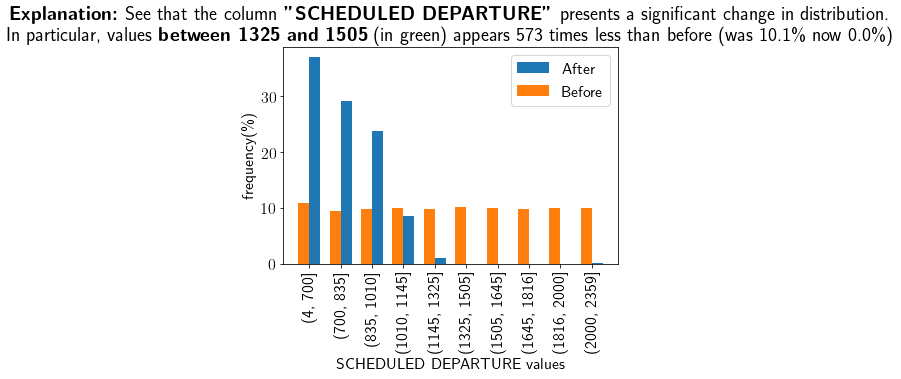

In [113]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 5, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
4,4,2015,8,24,1,MQ,3381,N694MQ,MOB,DFW,1910,1922.0,12.0,8.0,1930.0,110.0,107.0,83.0,539,2053.0,16.0,2100,2109.0,9.0,6
8,8,2015,4,17,5,DL,2394,N926DL,ATL,PHL,1735,1730.0,-5.0,12.0,1742.0,129.0,115.0,99.0,666,1921.0,4.0,1944,1925.0,-19.0,6
13,13,2015,5,19,2,EV,4538,N13979,GRR,EWR,2016,2037.0,21.0,12.0,2049.0,117.0,101.0,81.0,605,2210.0,8.0,2213,2218.0,5.0,6
17,17,2015,8,31,1,DL,788,N958DL,ATL,OKC,2104,2059.0,-5.0,18.0,2117.0,134.0,127.0,105.0,761,2202.0,4.0,2218,2206.0,-12.0,6
20,20,2015,10,22,4,EV,4415,N11547,13930,11775,2230,2221.0,-9.0,14.0,2235.0,100.0,88.0,69.0,462,2344.0,5.0,10,2349.0,-21.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49055,49960,2015,11,25,3,DL,2010,N986AT,ATL,SAV,2046,2045.0,-1.0,11.0,2056.0,64.0,53.0,37.0,214,2133.0,5.0,2150,2138.0,-12.0,6
49056,49962,2015,4,9,4,EV,5049,N740EV,BOS,RIC,1940,2049.0,69.0,22.0,2111.0,107.0,105.0,77.0,474,2228.0,6.0,2127,2234.0,67.0,6
49072,49979,2015,8,14,5,DL,1098,N356NW,ATL,OMA,1912,2009.0,57.0,11.0,2020.0,149.0,132.0,118.0,821,2118.0,3.0,2041,2121.0,40.0,6
49073,49980,2015,11,15,7,EV,4464,N14998,MEM,IAH,1625,1615.0,-10.0,12.0,1627.0,109.0,106.0,80.0,468,1747.0,14.0,1814,1801.0,-13.0,6


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
4,4,2015,8,24,1,MQ,3381,N694MQ,MOB,DFW,1910,1922.0,12.0,8.0,1930.0,110.0,107.0,83.0,539,2053.0,16.0,2100,2109.0,9.0,6
8,8,2015,4,17,5,DL,2394,N926DL,ATL,PHL,1735,1730.0,-5.0,12.0,1742.0,129.0,115.0,99.0,666,1921.0,4.0,1944,1925.0,-19.0,6
13,13,2015,5,19,2,EV,4538,N13979,GRR,EWR,2016,2037.0,21.0,12.0,2049.0,117.0,101.0,81.0,605,2210.0,8.0,2213,2218.0,5.0,6
17,17,2015,8,31,1,DL,788,N958DL,ATL,OKC,2104,2059.0,-5.0,18.0,2117.0,134.0,127.0,105.0,761,2202.0,4.0,2218,2206.0,-12.0,6
20,20,2015,10,22,4,EV,4415,N11547,13930,11775,2230,2221.0,-9.0,14.0,2235.0,100.0,88.0,69.0,462,2344.0,5.0,10,2349.0,-21.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49055,49960,2015,11,25,3,DL,2010,N986AT,ATL,SAV,2046,2045.0,-1.0,11.0,2056.0,64.0,53.0,37.0,214,2133.0,5.0,2150,2138.0,-12.0,6
49056,49962,2015,4,9,4,EV,5049,N740EV,BOS,RIC,1940,2049.0,69.0,22.0,2111.0,107.0,105.0,77.0,474,2228.0,6.0,2127,2234.0,67.0,6
49072,49979,2015,8,14,5,DL,1098,N356NW,ATL,OMA,1912,2009.0,57.0,11.0,2020.0,149.0,132.0,118.0,821,2118.0,3.0,2041,2121.0,40.0,6
49073,49980,2015,11,15,7,EV,4464,N14998,MEM,IAH,1625,1615.0,-10.0,12.0,1627.0,109.0,106.0,80.0,468,1747.0,14.0,1814,1801.0,-13.0,6


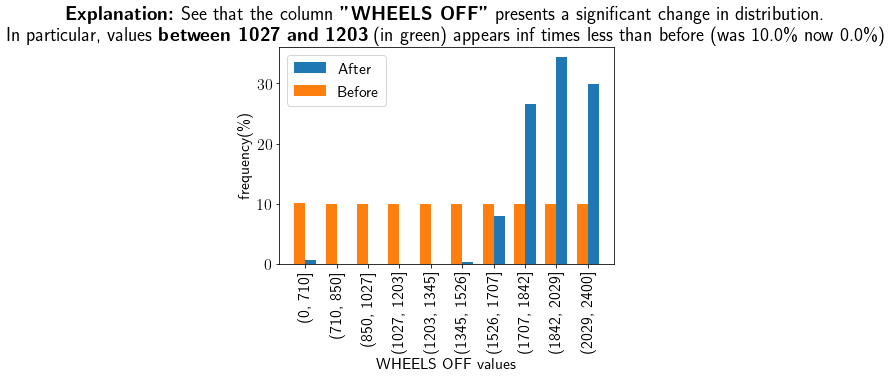

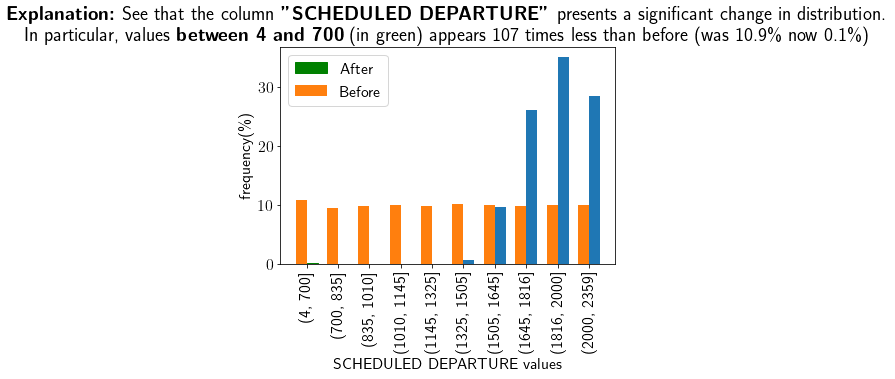

In [114]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 6, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
21,21,2015,5,31,7,OO,6383,N719SK,SLC,SFO,1345,1336.0,-9.0,11.0,1347.0,127.0,116.0,102.0,599,1429.0,3.0,1452,1432.0,-20.0,7
24,24,2015,12,12,6,MQ,3091,N658MQ,ORD,CMI,1516,1511.0,-5.0,16.0,1527.0,57.0,47.0,29.0,135,1556.0,2.0,1613,1558.0,-15.0,7
26,27,2015,4,18,6,MQ,2937,N696MQ,BHM,MIA,1245,1237.0,-8.0,9.0,1246.0,113.0,106.0,92.0,661,1518.0,5.0,1538,1523.0,-15.0,7
31,32,2015,1,15,4,OO,4696,N823AS,OKC,MSP,1630,1622.0,-8.0,15.0,1637.0,130.0,134.0,105.0,694,1822.0,14.0,1840,1836.0,-4.0,7
38,39,2015,12,30,3,OO,6206,N793SK,DEN,ASE,1727,1822.0,55.0,16.0,1838.0,49.0,47.0,28.0,125,1906.0,3.0,1816,1909.0,53.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49061,49967,2015,4,30,4,MQ,3264,N695MQ,JFK,BWI,1559,1606.0,7.0,27.0,1633.0,82.0,66.0,35.0,184,1708.0,4.0,1721,1712.0,-9.0,7
49071,49978,2015,1,19,1,OO,5539,N903SW,SLC,LAX,1413,1408.0,-5.0,9.0,1417.0,129.0,113.0,94.0,590,1451.0,10.0,1522,1501.0,-21.0,7
49077,49984,2015,12,15,2,OO,7420,N427SW,MSP,IMT,1125,1152.0,27.0,15.0,1207.0,79.0,61.0,42.0,257,1249.0,4.0,1244,1253.0,9.0,7
49085,49992,2015,11,1,7,EV,4387,N12530,IAH,MOB,1305,1301.0,-4.0,22.0,1323.0,84.0,91.0,63.0,427,1426.0,6.0,1429,1432.0,3.0,7


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
21,21,2015,5,31,7,OO,6383,N719SK,SLC,SFO,1345,1336.0,-9.0,11.0,1347.0,127.0,116.0,102.0,599,1429.0,3.0,1452,1432.0,-20.0,7
24,24,2015,12,12,6,MQ,3091,N658MQ,ORD,CMI,1516,1511.0,-5.0,16.0,1527.0,57.0,47.0,29.0,135,1556.0,2.0,1613,1558.0,-15.0,7
26,27,2015,4,18,6,MQ,2937,N696MQ,BHM,MIA,1245,1237.0,-8.0,9.0,1246.0,113.0,106.0,92.0,661,1518.0,5.0,1538,1523.0,-15.0,7
31,32,2015,1,15,4,OO,4696,N823AS,OKC,MSP,1630,1622.0,-8.0,15.0,1637.0,130.0,134.0,105.0,694,1822.0,14.0,1840,1836.0,-4.0,7
38,39,2015,12,30,3,OO,6206,N793SK,DEN,ASE,1727,1822.0,55.0,16.0,1838.0,49.0,47.0,28.0,125,1906.0,3.0,1816,1909.0,53.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49061,49967,2015,4,30,4,MQ,3264,N695MQ,JFK,BWI,1559,1606.0,7.0,27.0,1633.0,82.0,66.0,35.0,184,1708.0,4.0,1721,1712.0,-9.0,7
49071,49978,2015,1,19,1,OO,5539,N903SW,SLC,LAX,1413,1408.0,-5.0,9.0,1417.0,129.0,113.0,94.0,590,1451.0,10.0,1522,1501.0,-21.0,7
49077,49984,2015,12,15,2,OO,7420,N427SW,MSP,IMT,1125,1152.0,27.0,15.0,1207.0,79.0,61.0,42.0,257,1249.0,4.0,1244,1253.0,9.0,7
49085,49992,2015,11,1,7,EV,4387,N12530,IAH,MOB,1305,1301.0,-4.0,22.0,1323.0,84.0,91.0,63.0,427,1426.0,6.0,1429,1432.0,3.0,7


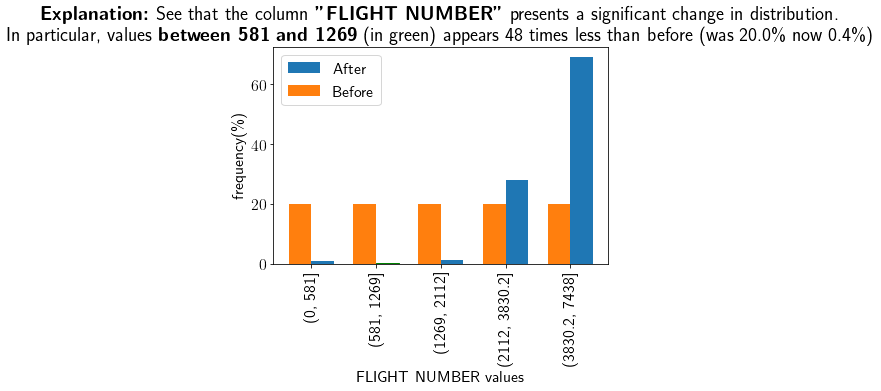

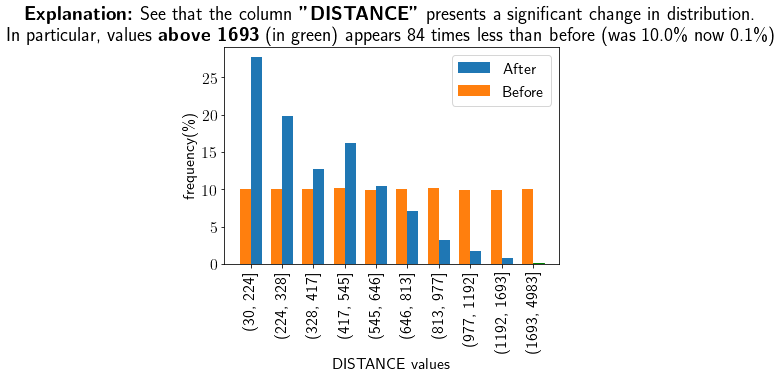

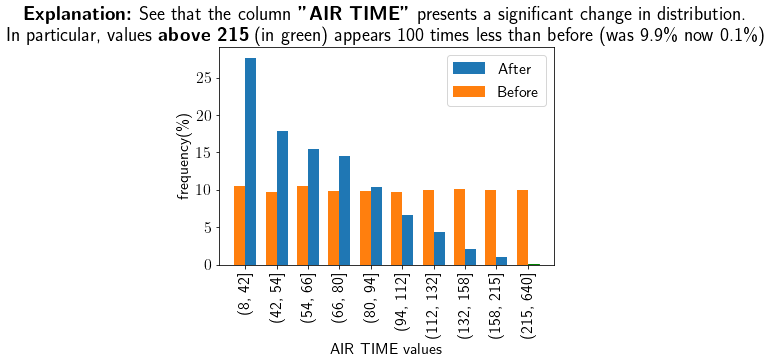

In [115]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 7, ignore={})

# Explaining the embedding - 15 clusters

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
1,1,2015,2,15,7,OO,4760,N629BR,SLC,GTF,2002,1955.0,-7.0,26.0,2021.0,100.0,105.0,76.0,463,2137.0,3.0,2142,2140.0,-2.0,0
31,32,2015,1,15,4,OO,4696,N823AS,OKC,MSP,1630,1622.0,-8.0,15.0,1637.0,130.0,134.0,105.0,694,1822.0,14.0,1840,1836.0,-4.0,0
38,39,2015,12,30,3,OO,6206,N793SK,DEN,ASE,1727,1822.0,55.0,16.0,1838.0,49.0,47.0,28.0,125,1906.0,3.0,1816,1909.0,53.0,0
52,53,2015,3,24,2,OO,4501,N804SK,SLC,LAS,1705,1704.0,-1.0,20.0,1724.0,89.0,83.0,57.0,368,1721.0,6.0,1734,1727.0,-7.0,0
59,60,2015,12,28,1,OO,2952,N435SW,TUS,LAX,1700,1655.0,-5.0,17.0,1712.0,95.0,98.0,76.0,451,1728.0,5.0,1735,1733.0,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48945,49849,2015,12,27,7,OO,2960,N464SW,FLG,PHX,1800,1751.0,-9.0,4.0,1755.0,57.0,43.0,26.0,119,1821.0,13.0,1857,1834.0,-23.0,0
48974,49878,2015,10,12,1,OO,6198,N679SA,11637,11292,1650,1645.0,-5.0,9.0,1654.0,125.0,106.0,90.0,627,1724.0,7.0,1755,1731.0,-24.0,0
49007,49912,2015,7,18,6,OO,4477,N603SK,SLC,LGB,1500,1457.0,-3.0,16.0,1513.0,117.0,117.0,97.0,588,1550.0,4.0,1557,1554.0,-3.0,0
49008,49913,2015,3,21,6,OO,2859,N417SW,SMF,LAX,1844,1836.0,-8.0,9.0,1845.0,96.0,85.0,65.0,373,1950.0,11.0,2020,2001.0,-19.0,0


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
1,1,2015,2,15,7,OO,4760,N629BR,SLC,GTF,2002,1955.0,-7.0,26.0,2021.0,100.0,105.0,76.0,463,2137.0,3.0,2142,2140.0,-2.0,0
31,32,2015,1,15,4,OO,4696,N823AS,OKC,MSP,1630,1622.0,-8.0,15.0,1637.0,130.0,134.0,105.0,694,1822.0,14.0,1840,1836.0,-4.0,0
38,39,2015,12,30,3,OO,6206,N793SK,DEN,ASE,1727,1822.0,55.0,16.0,1838.0,49.0,47.0,28.0,125,1906.0,3.0,1816,1909.0,53.0,0
52,53,2015,3,24,2,OO,4501,N804SK,SLC,LAS,1705,1704.0,-1.0,20.0,1724.0,89.0,83.0,57.0,368,1721.0,6.0,1734,1727.0,-7.0,0
59,60,2015,12,28,1,OO,2952,N435SW,TUS,LAX,1700,1655.0,-5.0,17.0,1712.0,95.0,98.0,76.0,451,1728.0,5.0,1735,1733.0,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48945,49849,2015,12,27,7,OO,2960,N464SW,FLG,PHX,1800,1751.0,-9.0,4.0,1755.0,57.0,43.0,26.0,119,1821.0,13.0,1857,1834.0,-23.0,0
48974,49878,2015,10,12,1,OO,6198,N679SA,11637,11292,1650,1645.0,-5.0,9.0,1654.0,125.0,106.0,90.0,627,1724.0,7.0,1755,1731.0,-24.0,0
49007,49912,2015,7,18,6,OO,4477,N603SK,SLC,LGB,1500,1457.0,-3.0,16.0,1513.0,117.0,117.0,97.0,588,1550.0,4.0,1557,1554.0,-3.0,0
49008,49913,2015,3,21,6,OO,2859,N417SW,SMF,LAX,1844,1836.0,-8.0,9.0,1845.0,96.0,85.0,65.0,373,1950.0,11.0,2020,2001.0,-19.0,0


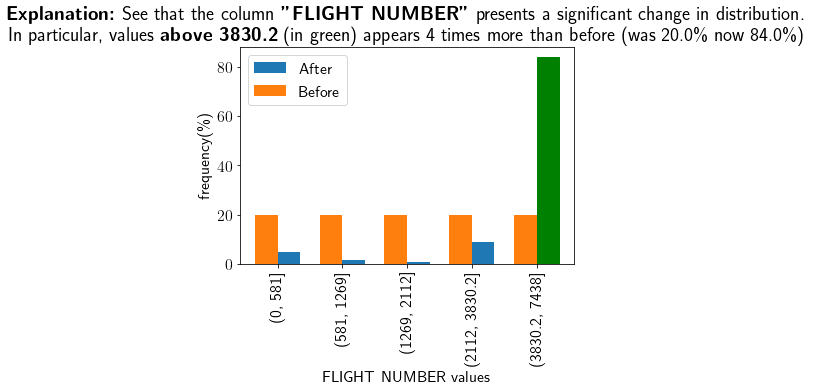

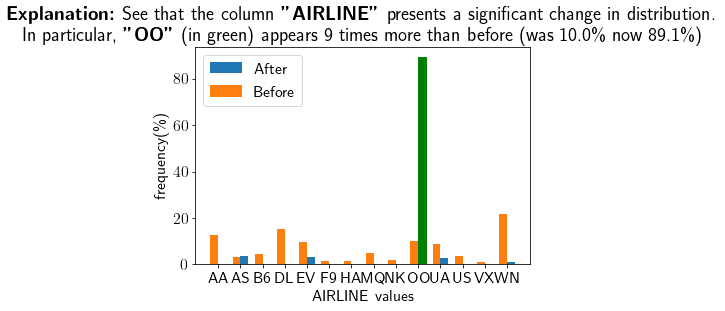

In [120]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 0, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
9,9,2015,12,17,4,WN,1839,N784SW,MCO,ALB,2055,2117.0,22.0,10.0,2127.0,160.0,138.0,125.0,1073,2332.0,3.0,2335,2335.0,0.0,1
10,10,2015,9,13,7,WN,238,N493WN,LAX,LAS,2015,2023.0,8.0,15.0,2038.0,60.0,66.0,45.0,236,2123.0,6.0,2115,2129.0,14.0,1
18,18,2015,8,19,3,WN,434,N8627B,DCA,AUS,1745,1740.0,-5.0,16.0,1756.0,210.0,204.0,183.0,1315,1959.0,5.0,2015,2004.0,-11.0,1
57,58,2015,4,17,5,WN,278,N224WN,DAL,STL,1735,1746.0,11.0,17.0,1803.0,95.0,90.0,71.0,546,1914.0,2.0,1910,1916.0,6.0,1
79,81,2015,1,24,6,WN,3443,N7719A,ATL,RDU,2050,2050.0,0.0,15.0,2105.0,85.0,72.0,54.0,356,2159.0,3.0,2215,2202.0,-13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49032,49937,2015,10,21,3,WN,1335,N909WN,12391,14027,1740,1732.0,-8.0,9.0,1741.0,170.0,154.0,138.0,1052,1959.0,7.0,2030,2006.0,-24.0,1
49035,49940,2015,8,27,4,WN,2075,N8634A,OKC,DEN,2000,2001.0,1.0,9.0,2010.0,95.0,98.0,83.0,495,2033.0,6.0,2035,2039.0,4.0,1
49039,49944,2015,9,4,5,WN,1681,N691WN,ATL,OKC,2040,2102.0,22.0,27.0,2129.0,135.0,134.0,103.0,761,2212.0,4.0,2155,2216.0,21.0,1
49062,49968,2015,3,16,1,WN,2962,N7718B,BWI,FLL,2155,2150.0,-5.0,11.0,2201.0,155.0,132.0,116.0,925,2357.0,5.0,30,2.0,-28.0,1


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
9,9,2015,12,17,4,WN,1839,N784SW,MCO,ALB,2055,2117.0,22.0,10.0,2127.0,160.0,138.0,125.0,1073,2332.0,3.0,2335,2335.0,0.0,1
10,10,2015,9,13,7,WN,238,N493WN,LAX,LAS,2015,2023.0,8.0,15.0,2038.0,60.0,66.0,45.0,236,2123.0,6.0,2115,2129.0,14.0,1
18,18,2015,8,19,3,WN,434,N8627B,DCA,AUS,1745,1740.0,-5.0,16.0,1756.0,210.0,204.0,183.0,1315,1959.0,5.0,2015,2004.0,-11.0,1
57,58,2015,4,17,5,WN,278,N224WN,DAL,STL,1735,1746.0,11.0,17.0,1803.0,95.0,90.0,71.0,546,1914.0,2.0,1910,1916.0,6.0,1
79,81,2015,1,24,6,WN,3443,N7719A,ATL,RDU,2050,2050.0,0.0,15.0,2105.0,85.0,72.0,54.0,356,2159.0,3.0,2215,2202.0,-13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49032,49937,2015,10,21,3,WN,1335,N909WN,12391,14027,1740,1732.0,-8.0,9.0,1741.0,170.0,154.0,138.0,1052,1959.0,7.0,2030,2006.0,-24.0,1
49035,49940,2015,8,27,4,WN,2075,N8634A,OKC,DEN,2000,2001.0,1.0,9.0,2010.0,95.0,98.0,83.0,495,2033.0,6.0,2035,2039.0,4.0,1
49039,49944,2015,9,4,5,WN,1681,N691WN,ATL,OKC,2040,2102.0,22.0,27.0,2129.0,135.0,134.0,103.0,761,2212.0,4.0,2155,2216.0,21.0,1
49062,49968,2015,3,16,1,WN,2962,N7718B,BWI,FLL,2155,2150.0,-5.0,11.0,2201.0,155.0,132.0,116.0,925,2357.0,5.0,30,2.0,-28.0,1


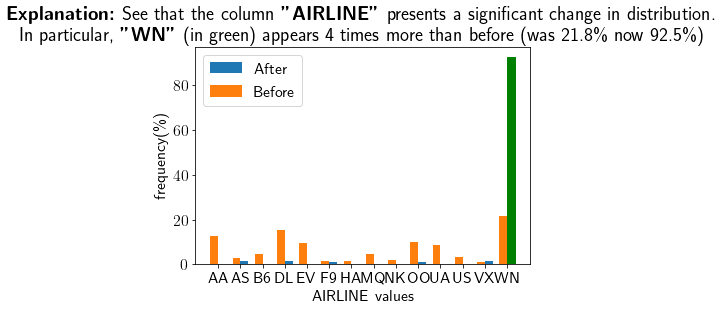

In [121]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 1, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
0,0,2015,7,23,4,DL,2197,N997DL,CMH,ATL,600,555.0,-5.0,14.0,609.0,91.0,82.0,64.0,447,713.0,4.0,731,717.0,-14.0,2
6,6,2015,11,12,4,DL,860,N346NB,SNA,MSP,645,640.0,-5.0,25.0,705.0,225.0,213.0,185.0,1522,1210.0,3.0,1230,1213.0,-17.0,2
28,29,2015,4,20,1,DL,2531,N686DA,SLC,ATL,700,652.0,-8.0,14.0,706.0,212.0,200.0,181.0,1590,1207.0,5.0,1232,1212.0,-20.0,2
62,63,2015,5,11,1,B6,160,N373JB,PHL,BOS,1020,1044.0,24.0,15.0,1059.0,86.0,67.0,44.0,280,1143.0,8.0,1146,1151.0,5.0,2
87,89,2015,10,7,3,DL,1213,N965AT,10423,11433,710,707.0,-3.0,9.0,716.0,178.0,162.0,144.0,1149,1040.0,9.0,1108,1049.0,-19.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49014,49919,2015,7,18,6,AA,1971,N770UW,IAH,CLT,1010,1007.0,-3.0,11.0,1018.0,153.0,143.0,123.0,912,1321.0,9.0,1343,1330.0,-13.0,2
49016,49921,2015,11,28,6,DL,1367,N924AT,ATL,GRR,838,837.0,-1.0,11.0,848.0,114.0,106.0,89.0,640,1017.0,6.0,1032,1023.0,-9.0,2
49033,49938,2015,3,3,2,DL,2091,N920DN,ATL,TPA,1030,1028.0,-2.0,32.0,1100.0,89.0,92.0,55.0,406,1155.0,5.0,1159,1200.0,1.0,2
49068,49975,2015,11,28,6,DL,2120,N608AT,MDW,ATL,1030,1027.0,-3.0,11.0,1038.0,113.0,100.0,84.0,591,1302.0,5.0,1323,1307.0,-16.0,2


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
0,0,2015,7,23,4,DL,2197,N997DL,CMH,ATL,600,555.0,-5.0,14.0,609.0,91.0,82.0,64.0,447,713.0,4.0,731,717.0,-14.0,2
6,6,2015,11,12,4,DL,860,N346NB,SNA,MSP,645,640.0,-5.0,25.0,705.0,225.0,213.0,185.0,1522,1210.0,3.0,1230,1213.0,-17.0,2
28,29,2015,4,20,1,DL,2531,N686DA,SLC,ATL,700,652.0,-8.0,14.0,706.0,212.0,200.0,181.0,1590,1207.0,5.0,1232,1212.0,-20.0,2
62,63,2015,5,11,1,B6,160,N373JB,PHL,BOS,1020,1044.0,24.0,15.0,1059.0,86.0,67.0,44.0,280,1143.0,8.0,1146,1151.0,5.0,2
87,89,2015,10,7,3,DL,1213,N965AT,10423,11433,710,707.0,-3.0,9.0,716.0,178.0,162.0,144.0,1149,1040.0,9.0,1108,1049.0,-19.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49014,49919,2015,7,18,6,AA,1971,N770UW,IAH,CLT,1010,1007.0,-3.0,11.0,1018.0,153.0,143.0,123.0,912,1321.0,9.0,1343,1330.0,-13.0,2
49016,49921,2015,11,28,6,DL,1367,N924AT,ATL,GRR,838,837.0,-1.0,11.0,848.0,114.0,106.0,89.0,640,1017.0,6.0,1032,1023.0,-9.0,2
49033,49938,2015,3,3,2,DL,2091,N920DN,ATL,TPA,1030,1028.0,-2.0,32.0,1100.0,89.0,92.0,55.0,406,1155.0,5.0,1159,1200.0,1.0,2
49068,49975,2015,11,28,6,DL,2120,N608AT,MDW,ATL,1030,1027.0,-3.0,11.0,1038.0,113.0,100.0,84.0,591,1302.0,5.0,1323,1307.0,-16.0,2


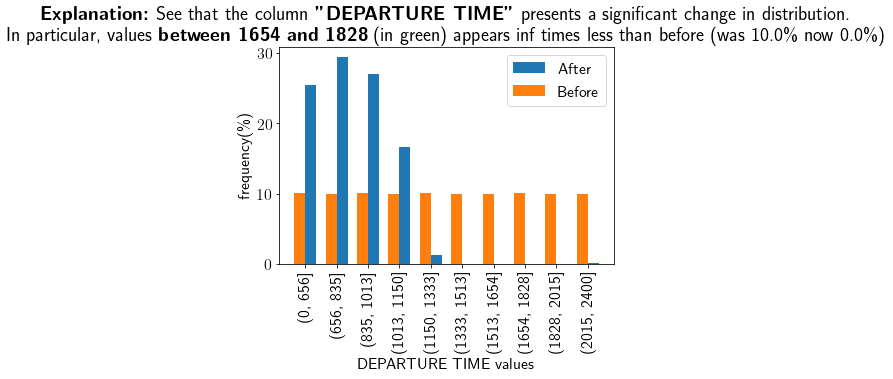

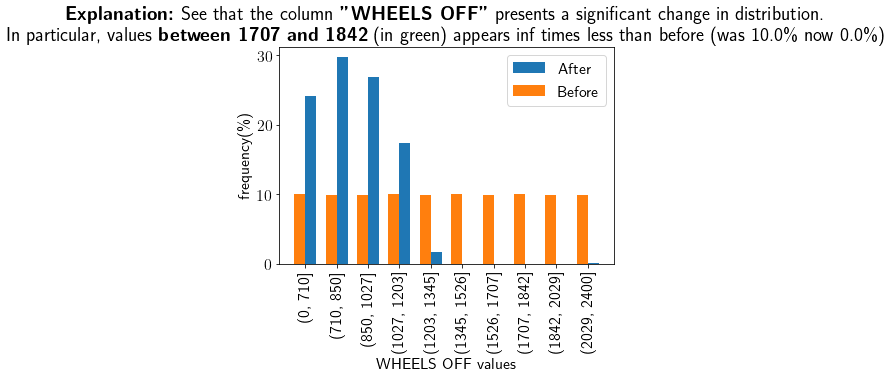

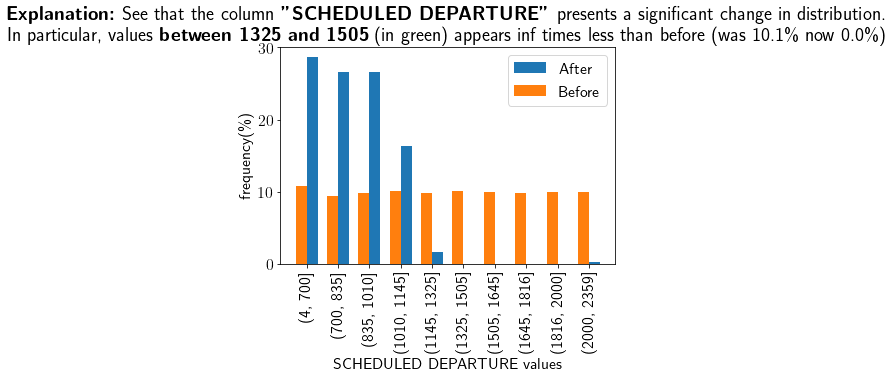

In [122]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 2, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
8,8,2015,4,17,5,DL,2394,N926DL,ATL,PHL,1735,1730.0,-5.0,12.0,1742.0,129.0,115.0,99.0,666,1921.0,4.0,1944,1925.0,-19.0,3
17,17,2015,8,31,1,DL,788,N958DL,ATL,OKC,2104,2059.0,-5.0,18.0,2117.0,134.0,127.0,105.0,761,2202.0,4.0,2218,2206.0,-12.0,3
32,33,2015,12,4,5,DL,864,N923DN,MSP,MSN,2149,2145.0,-4.0,11.0,2156.0,65.0,50.0,37.0,228,2233.0,2.0,2254,2235.0,-19.0,3
33,34,2015,9,11,5,DL,1873,N3754A,MIA,ATL,2015,2032.0,17.0,43.0,2115.0,117.0,129.0,82.0,594,2237.0,4.0,2212,2241.0,29.0,3
53,54,2015,2,6,5,DL,1101,N356NW,MSP,BWI,1932,1926.0,-6.0,24.0,1950.0,151.0,143.0,113.0,936,2243.0,6.0,2303,2249.0,-14.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49002,49907,2015,10,18,7,DL,1369,N940AT,13198,11433,1745,1742.0,-3.0,39.0,1821.0,113.0,136.0,91.0,629,2052.0,6.0,2038,2058.0,20.0,3
49012,49917,2015,12,22,2,AA,2039,N583UW,CLT,MSP,2215,2217.0,2.0,23.0,2240.0,161.0,156.0,130.0,930,2350.0,3.0,2356,2353.0,-3.0,3
49052,49957,2015,4,23,4,DL,2577,N661DN,MCO,ATL,2047,2041.0,-6.0,11.0,2052.0,88.0,88.0,66.0,404,2158.0,11.0,2215,2209.0,-6.0,3
49055,49960,2015,11,25,3,DL,2010,N986AT,ATL,SAV,2046,2045.0,-1.0,11.0,2056.0,64.0,53.0,37.0,214,2133.0,5.0,2150,2138.0,-12.0,3


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
8,8,2015,4,17,5,DL,2394,N926DL,ATL,PHL,1735,1730.0,-5.0,12.0,1742.0,129.0,115.0,99.0,666,1921.0,4.0,1944,1925.0,-19.0,3
17,17,2015,8,31,1,DL,788,N958DL,ATL,OKC,2104,2059.0,-5.0,18.0,2117.0,134.0,127.0,105.0,761,2202.0,4.0,2218,2206.0,-12.0,3
32,33,2015,12,4,5,DL,864,N923DN,MSP,MSN,2149,2145.0,-4.0,11.0,2156.0,65.0,50.0,37.0,228,2233.0,2.0,2254,2235.0,-19.0,3
33,34,2015,9,11,5,DL,1873,N3754A,MIA,ATL,2015,2032.0,17.0,43.0,2115.0,117.0,129.0,82.0,594,2237.0,4.0,2212,2241.0,29.0,3
53,54,2015,2,6,5,DL,1101,N356NW,MSP,BWI,1932,1926.0,-6.0,24.0,1950.0,151.0,143.0,113.0,936,2243.0,6.0,2303,2249.0,-14.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49002,49907,2015,10,18,7,DL,1369,N940AT,13198,11433,1745,1742.0,-3.0,39.0,1821.0,113.0,136.0,91.0,629,2052.0,6.0,2038,2058.0,20.0,3
49012,49917,2015,12,22,2,AA,2039,N583UW,CLT,MSP,2215,2217.0,2.0,23.0,2240.0,161.0,156.0,130.0,930,2350.0,3.0,2356,2353.0,-3.0,3
49052,49957,2015,4,23,4,DL,2577,N661DN,MCO,ATL,2047,2041.0,-6.0,11.0,2052.0,88.0,88.0,66.0,404,2158.0,11.0,2215,2209.0,-6.0,3
49055,49960,2015,11,25,3,DL,2010,N986AT,ATL,SAV,2046,2045.0,-1.0,11.0,2056.0,64.0,53.0,37.0,214,2133.0,5.0,2150,2138.0,-12.0,3


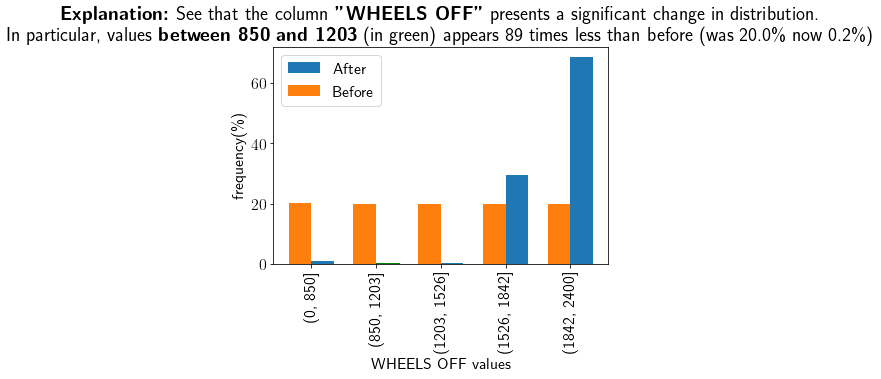

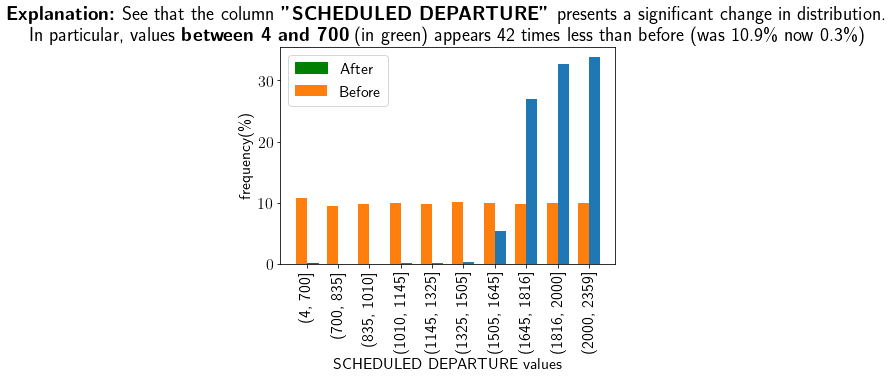

In [123]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 3, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
2,2,2015,2,26,4,UA,12,N57869,BOS,SFO,800,806.0,6.0,9.0,815.0,410.0,374.0,356.0,2704,1111.0,9.0,1150,1120.0,-30.0,4
7,7,2015,5,7,4,VX,415,N639VA,JFK,LAX,2010,2006.0,-4.0,44.0,2050.0,380.0,404.0,335.0,2475,2325.0,25.0,2330,2350.0,20.0,4
19,19,2015,10,19,1,UA,541,N587UA,12478,14771,835,837.0,2.0,18.0,855.0,377.0,372.0,334.0,2586,1129.0,20.0,1152,1149.0,-3.0,4
25,26,2015,11,26,4,HA,20,N588HA,HNL,SMF,1430,1511.0,41.0,19.0,1530.0,320.0,310.0,285.0,2462,2215.0,6.0,2150,2221.0,31.0,4
37,38,2015,5,29,5,AS,699,N525AS,GEG,SEA,600,549.0,-11.0,13.0,602.0,58.0,64.0,43.0,224,645.0,8.0,658,653.0,-5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49047,49952,2015,12,1,2,DL,41,N191DN,JFK,LAX,1815,1808.0,-7.0,23.0,1831.0,395.0,360.0,326.0,2475,2057.0,11.0,2150,2108.0,-42.0,4
49060,49966,2015,9,28,1,UA,1922,N18119,SFO,EWR,725,721.0,-4.0,17.0,738.0,340.0,321.0,294.0,2565,1532.0,10.0,1605,1542.0,-23.0,4
49069,49976,2015,9,1,2,AS,121,N768AS,SEA,ANC,2355,20.0,25.0,12.0,32.0,213.0,210.0,194.0,1448,246.0,4.0,228,250.0,22.0,4
49078,49985,2015,6,3,3,DL,419,N713TW,JFK,SEA,1605,1621.0,16.0,28.0,1649.0,379.0,347.0,313.0,2422,1902.0,6.0,1924,1908.0,-16.0,4


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
2,2,2015,2,26,4,UA,12,N57869,BOS,SFO,800,806.0,6.0,9.0,815.0,410.0,374.0,356.0,2704,1111.0,9.0,1150,1120.0,-30.0,4
7,7,2015,5,7,4,VX,415,N639VA,JFK,LAX,2010,2006.0,-4.0,44.0,2050.0,380.0,404.0,335.0,2475,2325.0,25.0,2330,2350.0,20.0,4
19,19,2015,10,19,1,UA,541,N587UA,12478,14771,835,837.0,2.0,18.0,855.0,377.0,372.0,334.0,2586,1129.0,20.0,1152,1149.0,-3.0,4
25,26,2015,11,26,4,HA,20,N588HA,HNL,SMF,1430,1511.0,41.0,19.0,1530.0,320.0,310.0,285.0,2462,2215.0,6.0,2150,2221.0,31.0,4
37,38,2015,5,29,5,AS,699,N525AS,GEG,SEA,600,549.0,-11.0,13.0,602.0,58.0,64.0,43.0,224,645.0,8.0,658,653.0,-5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49047,49952,2015,12,1,2,DL,41,N191DN,JFK,LAX,1815,1808.0,-7.0,23.0,1831.0,395.0,360.0,326.0,2475,2057.0,11.0,2150,2108.0,-42.0,4
49060,49966,2015,9,28,1,UA,1922,N18119,SFO,EWR,725,721.0,-4.0,17.0,738.0,340.0,321.0,294.0,2565,1532.0,10.0,1605,1542.0,-23.0,4
49069,49976,2015,9,1,2,AS,121,N768AS,SEA,ANC,2355,20.0,25.0,12.0,32.0,213.0,210.0,194.0,1448,246.0,4.0,228,250.0,22.0,4
49078,49985,2015,6,3,3,DL,419,N713TW,JFK,SEA,1605,1621.0,16.0,28.0,1649.0,379.0,347.0,313.0,2422,1902.0,6.0,1924,1908.0,-16.0,4


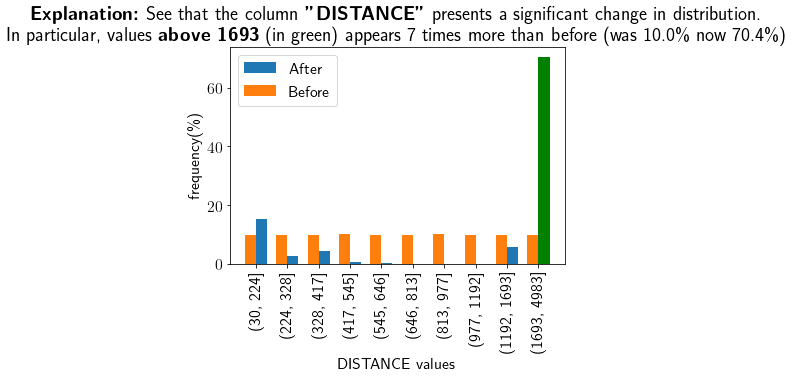

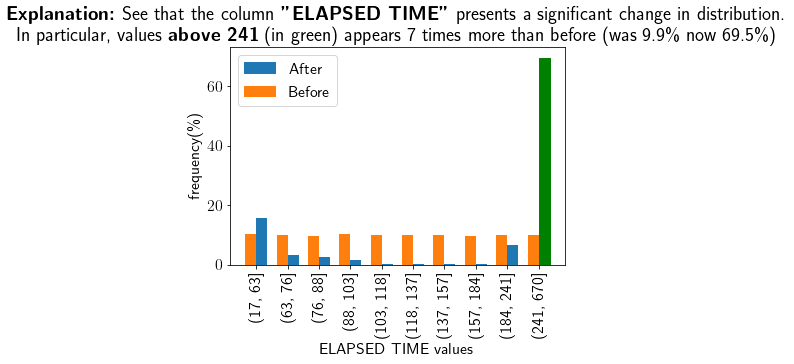

In [124]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 4, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
44,45,2015,8,8,6,MQ,3568,N693MQ,CVG,MIA,600,558.0,-2.0,13.0,611.0,155.0,138.0,120.0,948,811.0,5.0,835,816.0,-19.0,5
47,48,2015,8,21,5,EV,5910,N48901,BHM,ORD,916,926.0,10.0,11.0,937.0,128.0,111.0,93.0,584,1110.0,7.0,1124,1117.0,-7.0,5
61,62,2015,2,16,1,OO,4850,N685BR,FWA,ATL,740,758.0,18.0,11.0,809.0,119.0,100.0,82.0,508,931.0,7.0,939,938.0,-1.0,5
64,65,2015,3,26,4,EV,4882,N870AS,BTV,DTW,545,540.0,-5.0,10.0,550.0,139.0,109.0,94.0,537,724.0,5.0,804,729.0,-35.0,5
65,66,2015,4,27,1,MQ,2999,N5PBMQ,GRR,DFW,745,742.0,-3.0,14.0,756.0,165.0,180.0,147.0,931,923.0,19.0,930,942.0,12.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48975,49879,2015,5,1,5,MQ,3682,N530MQ,ATL,LGA,915,928.0,13.0,47.0,1015.0,144.0,160.0,105.0,762,1200.0,8.0,1139,1208.0,29.0,5
48989,49894,2015,1,7,3,EV,5113,N528CA,ATL,DHN,1031,1027.0,-4.0,18.0,1045.0,59.0,56.0,36.0,170,1021.0,2.0,1030,1023.0,-7.0,5
49003,49908,2015,4,13,1,EV,6106,N17159,SGF,DEN,906,905.0,-1.0,8.0,913.0,134.0,123.0,98.0,637,951.0,17.0,1020,1008.0,-12.0,5
49011,49916,2015,10,12,1,EV,4711,N16178,11278,11618,709,653.0,-16.0,25.0,718.0,66.0,73.0,41.0,199,759.0,7.0,815,806.0,-9.0,5


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
44,45,2015,8,8,6,MQ,3568,N693MQ,CVG,MIA,600,558.0,-2.0,13.0,611.0,155.0,138.0,120.0,948,811.0,5.0,835,816.0,-19.0,5
47,48,2015,8,21,5,EV,5910,N48901,BHM,ORD,916,926.0,10.0,11.0,937.0,128.0,111.0,93.0,584,1110.0,7.0,1124,1117.0,-7.0,5
61,62,2015,2,16,1,OO,4850,N685BR,FWA,ATL,740,758.0,18.0,11.0,809.0,119.0,100.0,82.0,508,931.0,7.0,939,938.0,-1.0,5
64,65,2015,3,26,4,EV,4882,N870AS,BTV,DTW,545,540.0,-5.0,10.0,550.0,139.0,109.0,94.0,537,724.0,5.0,804,729.0,-35.0,5
65,66,2015,4,27,1,MQ,2999,N5PBMQ,GRR,DFW,745,742.0,-3.0,14.0,756.0,165.0,180.0,147.0,931,923.0,19.0,930,942.0,12.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48975,49879,2015,5,1,5,MQ,3682,N530MQ,ATL,LGA,915,928.0,13.0,47.0,1015.0,144.0,160.0,105.0,762,1200.0,8.0,1139,1208.0,29.0,5
48989,49894,2015,1,7,3,EV,5113,N528CA,ATL,DHN,1031,1027.0,-4.0,18.0,1045.0,59.0,56.0,36.0,170,1021.0,2.0,1030,1023.0,-7.0,5
49003,49908,2015,4,13,1,EV,6106,N17159,SGF,DEN,906,905.0,-1.0,8.0,913.0,134.0,123.0,98.0,637,951.0,17.0,1020,1008.0,-12.0,5
49011,49916,2015,10,12,1,EV,4711,N16178,11278,11618,709,653.0,-16.0,25.0,718.0,66.0,73.0,41.0,199,759.0,7.0,815,806.0,-9.0,5


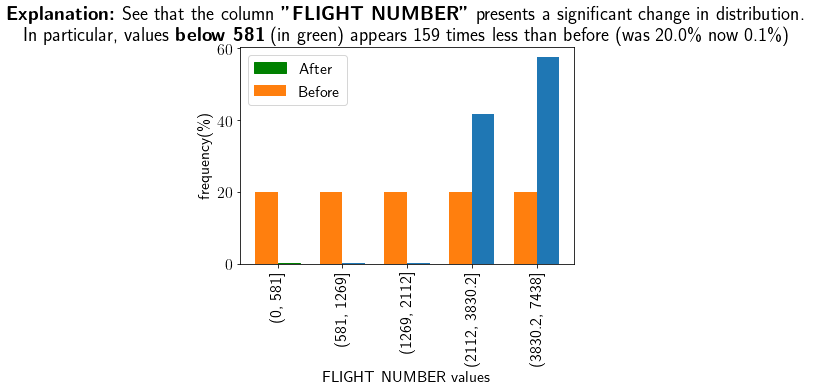

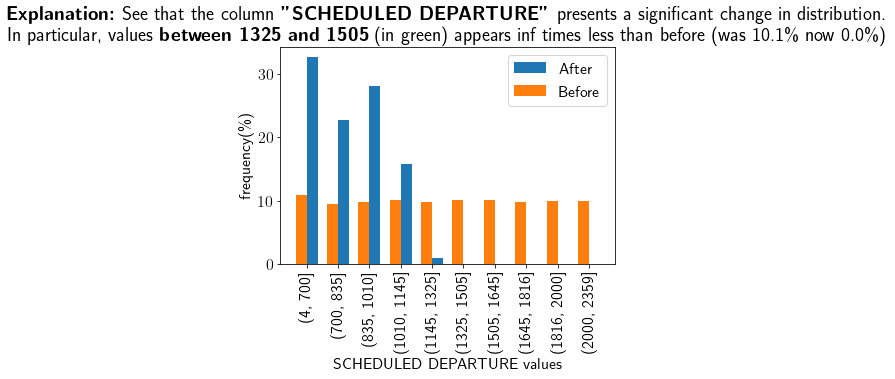

In [125]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 5, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
16,16,2015,11,11,3,AA,1773,N704US,PHL,FLL,1145,1214.0,29.0,11.0,1225.0,173.0,140.0,126.0,992,1431.0,3.0,1438,1434.0,-4.0,6
35,36,2015,1,30,5,AA,1271,N3BTAA,SNA,DFW,1217,1225.0,8.0,13.0,1238.0,168.0,176.0,147.0,1205,1705.0,16.0,1705,1721.0,16.0,6
41,42,2015,7,29,3,UA,461,N428UA,DEN,IAD,1252,1252.0,0.0,10.0,1302.0,206.0,180.0,165.0,1452,1747.0,5.0,1818,1752.0,-26.0,6
48,49,2015,6,14,7,AA,1561,N481AA,AUS,DFW,1152,1148.0,-4.0,11.0,1159.0,68.0,67.0,41.0,190,1240.0,15.0,1300,1255.0,-5.0,6
56,57,2015,4,26,7,DL,1847,N3767,SEA,ANC,1500,1454.0,-6.0,16.0,1510.0,212.0,202.0,183.0,1448,1713.0,3.0,1732,1716.0,-16.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49013,49918,2015,9,19,6,UA,591,N431UA,EWR,IAH,1028,1030.0,2.0,13.0,1043.0,218.0,207.0,180.0,1400,1243.0,14.0,1306,1257.0,-9.0,6
49022,49927,2015,8,25,2,AA,2224,N483AA,MSP,ORD,1209,1203.0,-6.0,14.0,1217.0,88.0,103.0,57.0,334,1314.0,32.0,1337,1346.0,9.0,6
49024,49929,2015,6,15,1,AS,178,N708AS,KTN,SEA,1210,1152.0,-18.0,13.0,1205.0,112.0,118.0,99.0,680,1444.0,6.0,1502,1450.0,-12.0,6
49029,49934,2015,1,10,6,AA,1412,N631AA,DFW,MIA,1350,1429.0,39.0,14.0,1443.0,162.0,195.0,132.0,1121,1755.0,49.0,1732,1844.0,72.0,6


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
16,16,2015,11,11,3,AA,1773,N704US,PHL,FLL,1145,1214.0,29.0,11.0,1225.0,173.0,140.0,126.0,992,1431.0,3.0,1438,1434.0,-4.0,6
35,36,2015,1,30,5,AA,1271,N3BTAA,SNA,DFW,1217,1225.0,8.0,13.0,1238.0,168.0,176.0,147.0,1205,1705.0,16.0,1705,1721.0,16.0,6
41,42,2015,7,29,3,UA,461,N428UA,DEN,IAD,1252,1252.0,0.0,10.0,1302.0,206.0,180.0,165.0,1452,1747.0,5.0,1818,1752.0,-26.0,6
48,49,2015,6,14,7,AA,1561,N481AA,AUS,DFW,1152,1148.0,-4.0,11.0,1159.0,68.0,67.0,41.0,190,1240.0,15.0,1300,1255.0,-5.0,6
56,57,2015,4,26,7,DL,1847,N3767,SEA,ANC,1500,1454.0,-6.0,16.0,1510.0,212.0,202.0,183.0,1448,1713.0,3.0,1732,1716.0,-16.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49013,49918,2015,9,19,6,UA,591,N431UA,EWR,IAH,1028,1030.0,2.0,13.0,1043.0,218.0,207.0,180.0,1400,1243.0,14.0,1306,1257.0,-9.0,6
49022,49927,2015,8,25,2,AA,2224,N483AA,MSP,ORD,1209,1203.0,-6.0,14.0,1217.0,88.0,103.0,57.0,334,1314.0,32.0,1337,1346.0,9.0,6
49024,49929,2015,6,15,1,AS,178,N708AS,KTN,SEA,1210,1152.0,-18.0,13.0,1205.0,112.0,118.0,99.0,680,1444.0,6.0,1502,1450.0,-12.0,6
49029,49934,2015,1,10,6,AA,1412,N631AA,DFW,MIA,1350,1429.0,39.0,14.0,1443.0,162.0,195.0,132.0,1121,1755.0,49.0,1732,1844.0,72.0,6


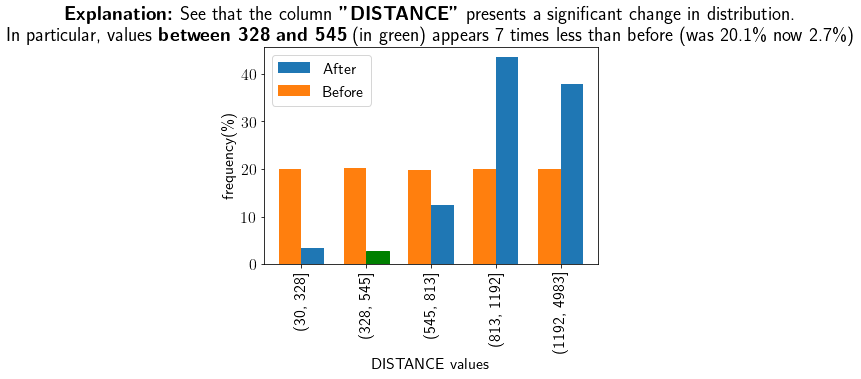

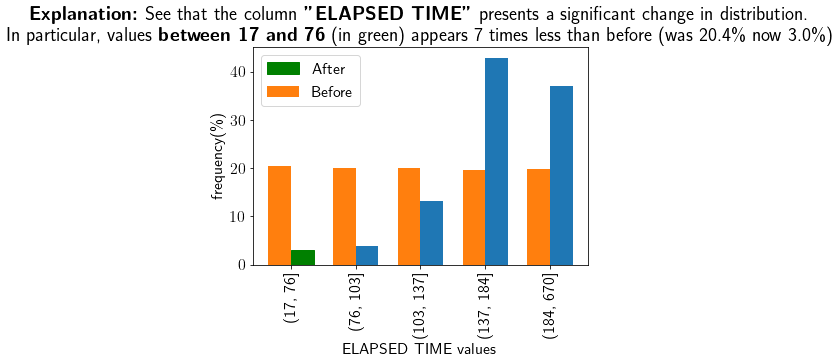

In [126]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 6, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
3,3,2015,2,11,3,UA,1578,N37409,IAH,BOS,1559,1624.0,25.0,13.0,1637.0,218.0,203.0,178.0,1597,2035.0,12.0,2037,2047.0,10.0,7
15,15,2015,2,25,3,F9,1275,N204FR,PHL,MIA,1650,1706.0,16.0,13.0,1719.0,175.0,167.0,148.0,1013,1947.0,6.0,1945,1953.0,8.0,7
43,44,2015,1,6,2,UA,1251,N37287,PDX,SFO,1820,1937.0,77.0,14.0,1951.0,113.0,103.0,86.0,550,2117.0,3.0,2013,2120.0,67.0,7
50,51,2015,12,9,3,UA,381,N454UA,DEN,OMA,2007,2004.0,-3.0,10.0,2014.0,81.0,70.0,57.0,472,2211.0,3.0,2228,2214.0,-14.0,7
51,52,2015,5,21,4,UA,439,N473UA,ORD,LAS,2225,2225.0,0.0,16.0,2241.0,237.0,227.0,206.0,1514,7.0,5.0,22,12.0,-10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49018,49923,2015,5,14,4,B6,328,N635JB,MCO,EWR,1936,1929.0,-7.0,25.0,1954.0,159.0,164.0,130.0,937,2204.0,9.0,2215,2213.0,-2.0,7
49025,49930,2015,10,31,6,F9,1317,N924FR,14635,13930,1845,1838.0,-7.0,11.0,1849.0,185.0,177.0,157.0,1120,2026.0,9.0,2050,2035.0,-15.0,7
49037,49942,2015,2,6,5,NK,240,N618NK,FLL,BWI,2035,2148.0,73.0,14.0,2202.0,144.0,148.0,126.0,925,8.0,8.0,2259,16.0,77.0,7
49040,49945,2015,4,4,6,UA,669,N849UA,DEN,DSM,1958,2141.0,103.0,12.0,2153.0,98.0,83.0,68.0,589,1.0,3.0,2236,4.0,88.0,7


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
3,3,2015,2,11,3,UA,1578,N37409,IAH,BOS,1559,1624.0,25.0,13.0,1637.0,218.0,203.0,178.0,1597,2035.0,12.0,2037,2047.0,10.0,7
15,15,2015,2,25,3,F9,1275,N204FR,PHL,MIA,1650,1706.0,16.0,13.0,1719.0,175.0,167.0,148.0,1013,1947.0,6.0,1945,1953.0,8.0,7
43,44,2015,1,6,2,UA,1251,N37287,PDX,SFO,1820,1937.0,77.0,14.0,1951.0,113.0,103.0,86.0,550,2117.0,3.0,2013,2120.0,67.0,7
50,51,2015,12,9,3,UA,381,N454UA,DEN,OMA,2007,2004.0,-3.0,10.0,2014.0,81.0,70.0,57.0,472,2211.0,3.0,2228,2214.0,-14.0,7
51,52,2015,5,21,4,UA,439,N473UA,ORD,LAS,2225,2225.0,0.0,16.0,2241.0,237.0,227.0,206.0,1514,7.0,5.0,22,12.0,-10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49018,49923,2015,5,14,4,B6,328,N635JB,MCO,EWR,1936,1929.0,-7.0,25.0,1954.0,159.0,164.0,130.0,937,2204.0,9.0,2215,2213.0,-2.0,7
49025,49930,2015,10,31,6,F9,1317,N924FR,14635,13930,1845,1838.0,-7.0,11.0,1849.0,185.0,177.0,157.0,1120,2026.0,9.0,2050,2035.0,-15.0,7
49037,49942,2015,2,6,5,NK,240,N618NK,FLL,BWI,2035,2148.0,73.0,14.0,2202.0,144.0,148.0,126.0,925,8.0,8.0,2259,16.0,77.0,7
49040,49945,2015,4,4,6,UA,669,N849UA,DEN,DSM,1958,2141.0,103.0,12.0,2153.0,98.0,83.0,68.0,589,1.0,3.0,2236,4.0,88.0,7


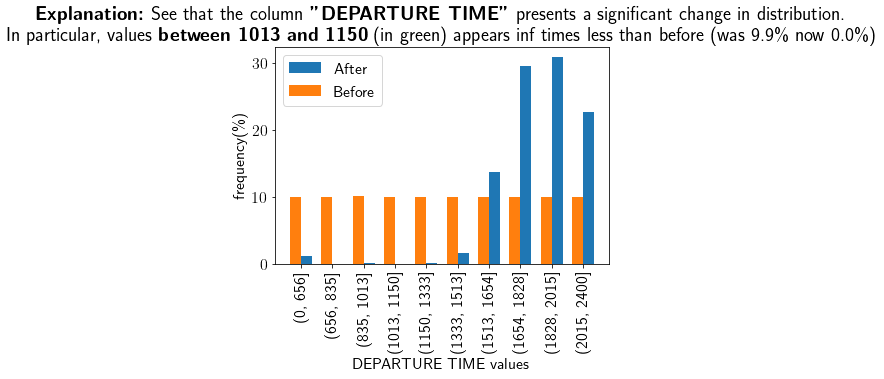

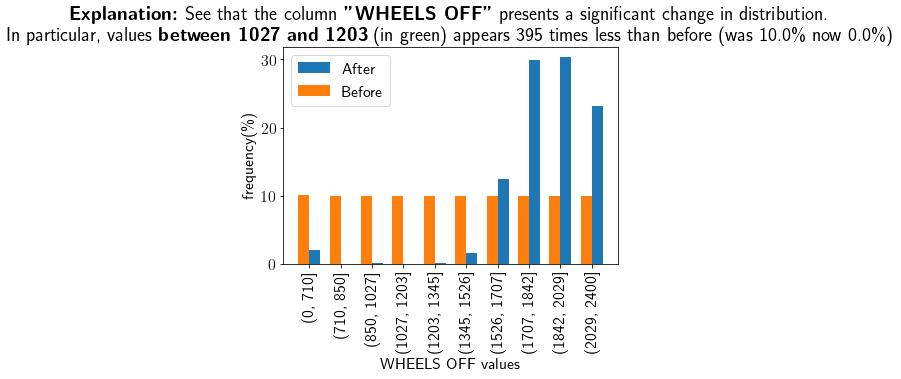

In [127]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 7, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
22,22,2015,5,10,7,WN,473,N563WN,DEN,SLC,1400,1400.0,0.0,12.0,1412.0,85.0,78.0,61.0,391,1513.0,5.0,1525,1518.0,-7.0,8
36,37,2015,11,20,5,WN,3015,N484WN,PHX,SLC,1555,1612.0,17.0,6.0,1618.0,90.0,84.0,75.0,507,1733.0,3.0,1725,1736.0,11.0,8
46,47,2015,1,15,4,WN,4885,N967WN,PBI,ISP,1150,1201.0,11.0,20.0,1221.0,155.0,163.0,138.0,1052,1439.0,5.0,1425,1444.0,19.0,8
76,78,2015,1,11,7,VX,956,N855VA,SFO,SAN,1145,1146.0,1.0,11.0,1157.0,95.0,109.0,75.0,447,1312.0,23.0,1320,1335.0,15.0,8
94,96,2015,3,22,7,WN,674,N740SW,MCO,MHT,1410,1409.0,-1.0,7.0,1416.0,165.0,157.0,146.0,1142,1642.0,4.0,1655,1646.0,-9.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49058,49964,2015,3,21,6,WN,1161,N623SW,BWI,ECP,1410,1417.0,7.0,9.0,1426.0,140.0,131.0,119.0,798,1525.0,3.0,1530,1528.0,-2.0,8
49063,49969,2015,10,24,6,WN,1657,N275WN,12889,14869,1335,1334.0,-1.0,13.0,1347.0,80.0,74.0,58.0,368,1545.0,3.0,1555,1548.0,-7.0,8
49064,49970,2015,5,1,5,WN,3766,N219WN,OAK,SAN,1305,1709.0,244.0,7.0,1716.0,85.0,82.0,72.0,446,1828.0,3.0,1430,1831.0,241.0,8
49083,49990,2015,10,31,6,WN,3538,N489WN,10800,14893,1345,1341.0,-4.0,10.0,1351.0,75.0,73.0,59.0,358,1450.0,4.0,1500,1454.0,-6.0,8


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
22,22,2015,5,10,7,WN,473,N563WN,DEN,SLC,1400,1400.0,0.0,12.0,1412.0,85.0,78.0,61.0,391,1513.0,5.0,1525,1518.0,-7.0,8
36,37,2015,11,20,5,WN,3015,N484WN,PHX,SLC,1555,1612.0,17.0,6.0,1618.0,90.0,84.0,75.0,507,1733.0,3.0,1725,1736.0,11.0,8
46,47,2015,1,15,4,WN,4885,N967WN,PBI,ISP,1150,1201.0,11.0,20.0,1221.0,155.0,163.0,138.0,1052,1439.0,5.0,1425,1444.0,19.0,8
76,78,2015,1,11,7,VX,956,N855VA,SFO,SAN,1145,1146.0,1.0,11.0,1157.0,95.0,109.0,75.0,447,1312.0,23.0,1320,1335.0,15.0,8
94,96,2015,3,22,7,WN,674,N740SW,MCO,MHT,1410,1409.0,-1.0,7.0,1416.0,165.0,157.0,146.0,1142,1642.0,4.0,1655,1646.0,-9.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49058,49964,2015,3,21,6,WN,1161,N623SW,BWI,ECP,1410,1417.0,7.0,9.0,1426.0,140.0,131.0,119.0,798,1525.0,3.0,1530,1528.0,-2.0,8
49063,49969,2015,10,24,6,WN,1657,N275WN,12889,14869,1335,1334.0,-1.0,13.0,1347.0,80.0,74.0,58.0,368,1545.0,3.0,1555,1548.0,-7.0,8
49064,49970,2015,5,1,5,WN,3766,N219WN,OAK,SAN,1305,1709.0,244.0,7.0,1716.0,85.0,82.0,72.0,446,1828.0,3.0,1430,1831.0,241.0,8
49083,49990,2015,10,31,6,WN,3538,N489WN,10800,14893,1345,1341.0,-4.0,10.0,1351.0,75.0,73.0,59.0,358,1450.0,4.0,1500,1454.0,-6.0,8


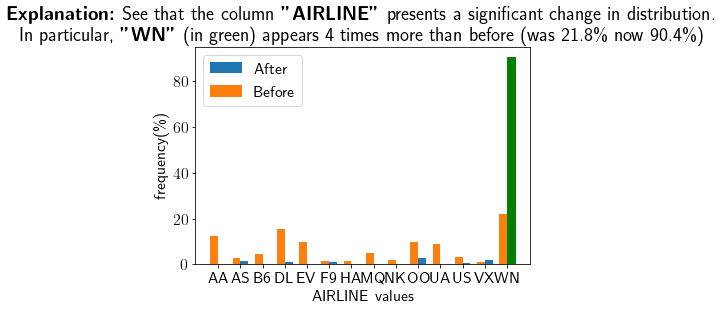

In [128]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 8, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
4,4,2015,8,24,1,MQ,3381,N694MQ,MOB,DFW,1910,1922.0,12.0,8.0,1930.0,110.0,107.0,83.0,539,2053.0,16.0,2100,2109.0,9.0,9
13,13,2015,5,19,2,EV,4538,N13979,GRR,EWR,2016,2037.0,21.0,12.0,2049.0,117.0,101.0,81.0,605,2210.0,8.0,2213,2218.0,5.0,9
20,20,2015,10,22,4,EV,4415,N11547,13930,11775,2230,2221.0,-9.0,14.0,2235.0,100.0,88.0,69.0,462,2344.0,5.0,10,2349.0,-21.0,9
27,28,2015,5,10,7,EV,4351,N14148,EWR,JAX,2119,2115.0,-4.0,16.0,2131.0,154.0,139.0,112.0,820,2323.0,11.0,2353,2334.0,-19.0,9
40,41,2015,4,5,7,EV,6100,N15985,ORD,PIA,2105,2057.0,-8.0,14.0,2111.0,60.0,45.0,26.0,130,2137.0,5.0,2205,2142.0,-23.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49026,49931,2015,3,19,4,EV,5070,N936EV,TVC,DTW,1759,1750.0,-9.0,10.0,1800.0,66.0,56.0,40.0,207,1840.0,6.0,1905,1846.0,-19.0,9
49030,49935,2015,7,8,3,EV,5141,N138EV,HPN,ATL,1726,1732.0,6.0,14.0,1746.0,142.0,127.0,106.0,780,1932.0,7.0,1948,1939.0,-9.0,9
49056,49962,2015,4,9,4,EV,5049,N740EV,BOS,RIC,1940,2049.0,69.0,22.0,2111.0,107.0,105.0,77.0,474,2228.0,6.0,2127,2234.0,67.0,9
49073,49980,2015,11,15,7,EV,4464,N14998,MEM,IAH,1625,1615.0,-10.0,12.0,1627.0,109.0,106.0,80.0,468,1747.0,14.0,1814,1801.0,-13.0,9


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
4,4,2015,8,24,1,MQ,3381,N694MQ,MOB,DFW,1910,1922.0,12.0,8.0,1930.0,110.0,107.0,83.0,539,2053.0,16.0,2100,2109.0,9.0,9
13,13,2015,5,19,2,EV,4538,N13979,GRR,EWR,2016,2037.0,21.0,12.0,2049.0,117.0,101.0,81.0,605,2210.0,8.0,2213,2218.0,5.0,9
20,20,2015,10,22,4,EV,4415,N11547,13930,11775,2230,2221.0,-9.0,14.0,2235.0,100.0,88.0,69.0,462,2344.0,5.0,10,2349.0,-21.0,9
27,28,2015,5,10,7,EV,4351,N14148,EWR,JAX,2119,2115.0,-4.0,16.0,2131.0,154.0,139.0,112.0,820,2323.0,11.0,2353,2334.0,-19.0,9
40,41,2015,4,5,7,EV,6100,N15985,ORD,PIA,2105,2057.0,-8.0,14.0,2111.0,60.0,45.0,26.0,130,2137.0,5.0,2205,2142.0,-23.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49026,49931,2015,3,19,4,EV,5070,N936EV,TVC,DTW,1759,1750.0,-9.0,10.0,1800.0,66.0,56.0,40.0,207,1840.0,6.0,1905,1846.0,-19.0,9
49030,49935,2015,7,8,3,EV,5141,N138EV,HPN,ATL,1726,1732.0,6.0,14.0,1746.0,142.0,127.0,106.0,780,1932.0,7.0,1948,1939.0,-9.0,9
49056,49962,2015,4,9,4,EV,5049,N740EV,BOS,RIC,1940,2049.0,69.0,22.0,2111.0,107.0,105.0,77.0,474,2228.0,6.0,2127,2234.0,67.0,9
49073,49980,2015,11,15,7,EV,4464,N14998,MEM,IAH,1625,1615.0,-10.0,12.0,1627.0,109.0,106.0,80.0,468,1747.0,14.0,1814,1801.0,-13.0,9


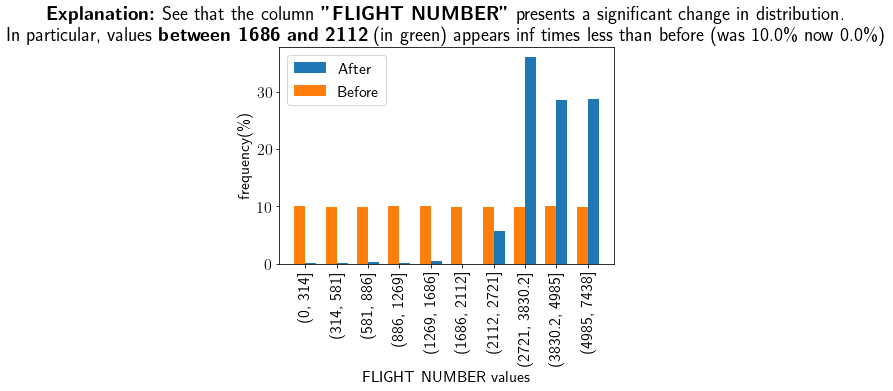

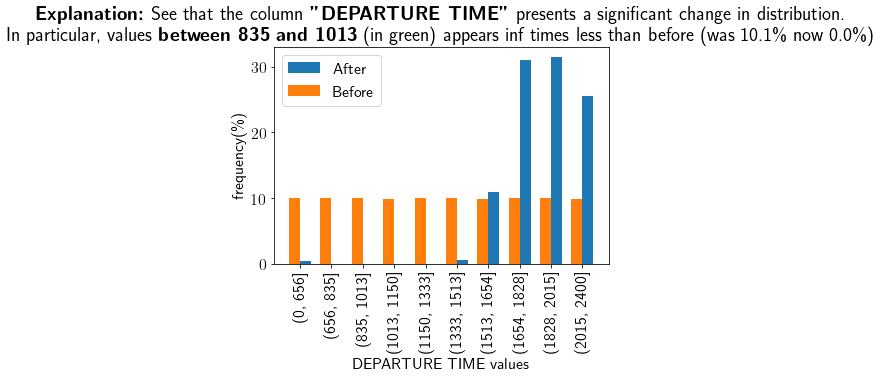

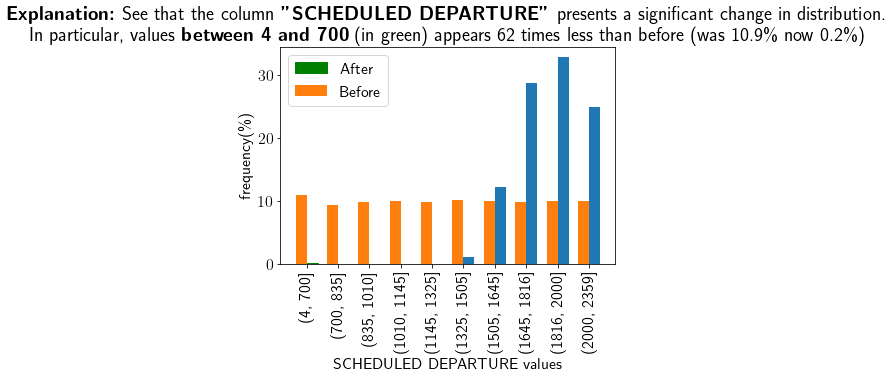

In [129]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 9, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
24,24,2015,12,12,6,MQ,3091,N658MQ,ORD,CMI,1516,1511.0,-5.0,16.0,1527.0,57.0,47.0,29.0,135,1556.0,2.0,1613,1558.0,-15.0,10
26,27,2015,4,18,6,MQ,2937,N696MQ,BHM,MIA,1245,1237.0,-8.0,9.0,1246.0,113.0,106.0,92.0,661,1518.0,5.0,1538,1523.0,-15.0,10
54,55,2015,2,15,7,EV,4490,N13538,IAH,LIT,1019,1054.0,35.0,12.0,1106.0,78.0,68.0,51.0,374,1157.0,5.0,1137,1202.0,25.0,10
55,56,2015,4,14,2,OO,4746,N781CA,FWA,DTW,1557,1551.0,-6.0,22.0,1613.0,58.0,59.0,34.0,128,1647.0,3.0,1655,1650.0,-5.0,10
72,74,2015,2,21,6,EV,5033,N883AS,ABE,ATL,1400,1359.0,-1.0,33.0,1432.0,138.0,161.0,123.0,692,1635.0,5.0,1618,1640.0,22.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49050,49955,2015,1,25,7,MQ,3134,N508MQ,STL,LGA,1320,1311.0,-9.0,10.0,1321.0,132.0,139.0,115.0,888,1616.0,14.0,1632,1630.0,-2.0,10
49057,49963,2015,6,28,7,MQ,3614,N638MQ,DFW,HOU,1615,1646.0,31.0,15.0,1701.0,67.0,65.0,44.0,247,1745.0,6.0,1722,1751.0,29.0,10
49061,49967,2015,4,30,4,MQ,3264,N695MQ,JFK,BWI,1559,1606.0,7.0,27.0,1633.0,82.0,66.0,35.0,184,1708.0,4.0,1721,1712.0,-9.0,10
49085,49992,2015,11,1,7,EV,4387,N12530,IAH,MOB,1305,1301.0,-4.0,22.0,1323.0,84.0,91.0,63.0,427,1426.0,6.0,1429,1432.0,3.0,10


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
24,24,2015,12,12,6,MQ,3091,N658MQ,ORD,CMI,1516,1511.0,-5.0,16.0,1527.0,57.0,47.0,29.0,135,1556.0,2.0,1613,1558.0,-15.0,10
26,27,2015,4,18,6,MQ,2937,N696MQ,BHM,MIA,1245,1237.0,-8.0,9.0,1246.0,113.0,106.0,92.0,661,1518.0,5.0,1538,1523.0,-15.0,10
54,55,2015,2,15,7,EV,4490,N13538,IAH,LIT,1019,1054.0,35.0,12.0,1106.0,78.0,68.0,51.0,374,1157.0,5.0,1137,1202.0,25.0,10
55,56,2015,4,14,2,OO,4746,N781CA,FWA,DTW,1557,1551.0,-6.0,22.0,1613.0,58.0,59.0,34.0,128,1647.0,3.0,1655,1650.0,-5.0,10
72,74,2015,2,21,6,EV,5033,N883AS,ABE,ATL,1400,1359.0,-1.0,33.0,1432.0,138.0,161.0,123.0,692,1635.0,5.0,1618,1640.0,22.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49050,49955,2015,1,25,7,MQ,3134,N508MQ,STL,LGA,1320,1311.0,-9.0,10.0,1321.0,132.0,139.0,115.0,888,1616.0,14.0,1632,1630.0,-2.0,10
49057,49963,2015,6,28,7,MQ,3614,N638MQ,DFW,HOU,1615,1646.0,31.0,15.0,1701.0,67.0,65.0,44.0,247,1745.0,6.0,1722,1751.0,29.0,10
49061,49967,2015,4,30,4,MQ,3264,N695MQ,JFK,BWI,1559,1606.0,7.0,27.0,1633.0,82.0,66.0,35.0,184,1708.0,4.0,1721,1712.0,-9.0,10
49085,49992,2015,11,1,7,EV,4387,N12530,IAH,MOB,1305,1301.0,-4.0,22.0,1323.0,84.0,91.0,63.0,427,1426.0,6.0,1429,1432.0,3.0,10


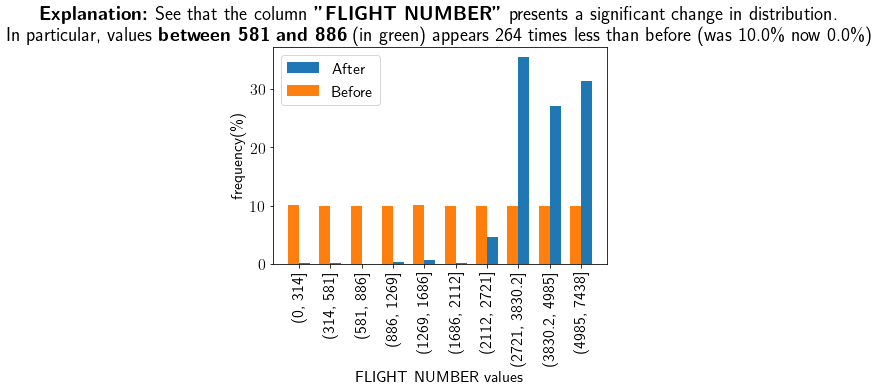

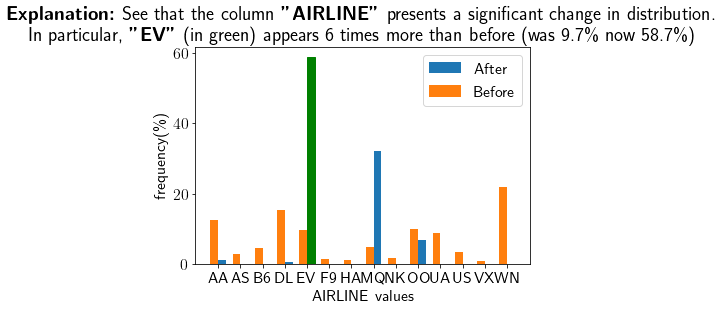

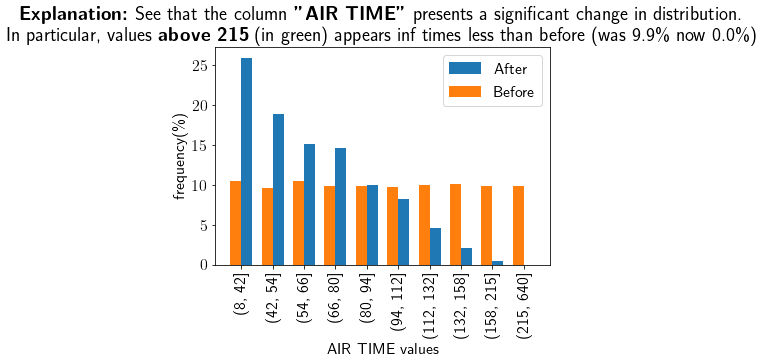

In [130]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 10, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
12,12,2015,1,15,4,OO,6416,N779SK,SFO,ABQ,1052,1042.0,-10.0,17.0,1059.0,139.0,140.0,118.0,896,1357.0,5.0,1411,1402.0,-9.0,11
21,21,2015,5,31,7,OO,6383,N719SK,SLC,SFO,1345,1336.0,-9.0,11.0,1347.0,127.0,116.0,102.0,599,1429.0,3.0,1452,1432.0,-20.0,11
29,30,2015,8,5,3,OO,5415,N908SW,MKE,ORD,732,717.0,-15.0,15.0,732.0,52.0,48.0,22.0,67,754.0,11.0,824,805.0,-19.0,11
30,31,2015,8,20,4,OO,2891,N464SW,LAX,SMF,800,801.0,1.0,27.0,828.0,93.0,94.0,61.0,373,929.0,6.0,933,935.0,2.0,11
42,43,2015,11,27,5,OO,5490,N956SW,PSP,SFO,1044,1044.0,0.0,22.0,1106.0,98.0,100.0,74.0,421,1220.0,4.0,1222,1224.0,2.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49001,49906,2015,7,24,5,OO,5604,N752SK,ACV,SFO,530,523.0,-7.0,11.0,534.0,74.0,56.0,41.0,250,615.0,4.0,644,619.0,-25.0,11
49051,49956,2015,11,8,7,OO,7381,N487CA,SLC,COD,1112,1104.0,-8.0,21.0,1125.0,75.0,67.0,43.0,298,1208.0,3.0,1227,1211.0,-16.0,11
49066,49973,2015,12,9,3,OO,5765,N507CA,DEN,LNK,1000,951.0,-9.0,10.0,1001.0,81.0,73.0,59.0,423,1200.0,4.0,1221,1204.0,-17.0,11
49071,49978,2015,1,19,1,OO,5539,N903SW,SLC,LAX,1413,1408.0,-5.0,9.0,1417.0,129.0,113.0,94.0,590,1451.0,10.0,1522,1501.0,-21.0,11


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
12,12,2015,1,15,4,OO,6416,N779SK,SFO,ABQ,1052,1042.0,-10.0,17.0,1059.0,139.0,140.0,118.0,896,1357.0,5.0,1411,1402.0,-9.0,11
21,21,2015,5,31,7,OO,6383,N719SK,SLC,SFO,1345,1336.0,-9.0,11.0,1347.0,127.0,116.0,102.0,599,1429.0,3.0,1452,1432.0,-20.0,11
29,30,2015,8,5,3,OO,5415,N908SW,MKE,ORD,732,717.0,-15.0,15.0,732.0,52.0,48.0,22.0,67,754.0,11.0,824,805.0,-19.0,11
30,31,2015,8,20,4,OO,2891,N464SW,LAX,SMF,800,801.0,1.0,27.0,828.0,93.0,94.0,61.0,373,929.0,6.0,933,935.0,2.0,11
42,43,2015,11,27,5,OO,5490,N956SW,PSP,SFO,1044,1044.0,0.0,22.0,1106.0,98.0,100.0,74.0,421,1220.0,4.0,1222,1224.0,2.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49001,49906,2015,7,24,5,OO,5604,N752SK,ACV,SFO,530,523.0,-7.0,11.0,534.0,74.0,56.0,41.0,250,615.0,4.0,644,619.0,-25.0,11
49051,49956,2015,11,8,7,OO,7381,N487CA,SLC,COD,1112,1104.0,-8.0,21.0,1125.0,75.0,67.0,43.0,298,1208.0,3.0,1227,1211.0,-16.0,11
49066,49973,2015,12,9,3,OO,5765,N507CA,DEN,LNK,1000,951.0,-9.0,10.0,1001.0,81.0,73.0,59.0,423,1200.0,4.0,1221,1204.0,-17.0,11
49071,49978,2015,1,19,1,OO,5539,N903SW,SLC,LAX,1413,1408.0,-5.0,9.0,1417.0,129.0,113.0,94.0,590,1451.0,10.0,1522,1501.0,-21.0,11


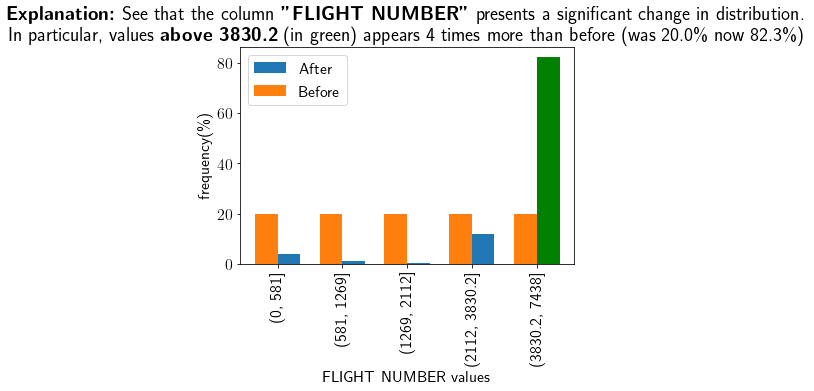

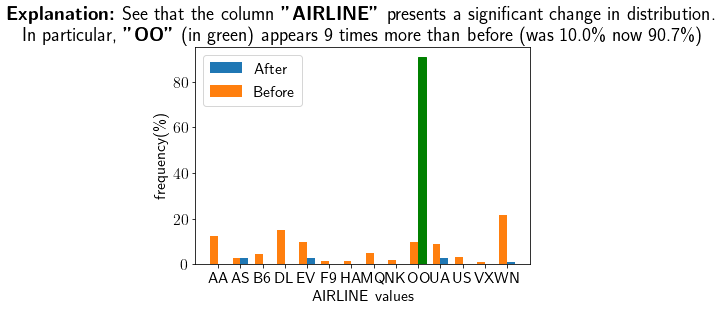

In [131]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 11, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
11,11,2015,4,22,3,WN,142,N220WN,STL,DEN,1000,959.0,-1.0,7.0,1006.0,145.0,130.0,115.0,770,1101.0,8.0,1125,1109.0,-16.0,12
23,23,2015,7,25,6,WN,1585,N605SW,BWI,CHS,900,900.0,0.0,23.0,923.0,100.0,98.0,68.0,472,1031.0,7.0,1040,1038.0,-2.0,12
66,68,2015,7,8,3,WN,290,N685SW,STL,OKC,1000,1003.0,3.0,12.0,1015.0,85.0,95.0,79.0,462,1134.0,4.0,1125,1138.0,13.0,12
102,104,2015,10,10,6,WN,971,N522SW,13158,11259,635,630.0,-5.0,11.0,641.0,70.0,69.0,50.0,319,731.0,8.0,745,739.0,-6.0,12
127,129,2015,7,5,7,WN,2702,N477WN,RSW,MDW,800,753.0,-7.0,22.0,815.0,170.0,174.0,147.0,1105,942.0,5.0,950,947.0,-3.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49028,49933,2015,6,3,3,WN,2775,N273WN,SJC,BUR,935,930.0,-5.0,7.0,937.0,60.0,53.0,43.0,296,1020.0,3.0,1035,1023.0,-12.0,12
49059,49965,2015,7,2,4,WN,617,N373SW,ATL,RSW,950,1001.0,11.0,17.0,1018.0,105.0,100.0,79.0,515,1137.0,4.0,1135,1141.0,6.0,12
49065,49972,2015,12,2,3,WN,683,N252WN,CMH,STL,825,822.0,-3.0,8.0,830.0,95.0,85.0,68.0,409,838.0,9.0,900,847.0,-13.0,12
49067,49974,2015,5,28,4,WN,4730,N925WN,BHM,DAL,945,944.0,-1.0,10.0,954.0,110.0,101.0,85.0,587,1119.0,6.0,1135,1125.0,-10.0,12


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
11,11,2015,4,22,3,WN,142,N220WN,STL,DEN,1000,959.0,-1.0,7.0,1006.0,145.0,130.0,115.0,770,1101.0,8.0,1125,1109.0,-16.0,12
23,23,2015,7,25,6,WN,1585,N605SW,BWI,CHS,900,900.0,0.0,23.0,923.0,100.0,98.0,68.0,472,1031.0,7.0,1040,1038.0,-2.0,12
66,68,2015,7,8,3,WN,290,N685SW,STL,OKC,1000,1003.0,3.0,12.0,1015.0,85.0,95.0,79.0,462,1134.0,4.0,1125,1138.0,13.0,12
102,104,2015,10,10,6,WN,971,N522SW,13158,11259,635,630.0,-5.0,11.0,641.0,70.0,69.0,50.0,319,731.0,8.0,745,739.0,-6.0,12
127,129,2015,7,5,7,WN,2702,N477WN,RSW,MDW,800,753.0,-7.0,22.0,815.0,170.0,174.0,147.0,1105,942.0,5.0,950,947.0,-3.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49028,49933,2015,6,3,3,WN,2775,N273WN,SJC,BUR,935,930.0,-5.0,7.0,937.0,60.0,53.0,43.0,296,1020.0,3.0,1035,1023.0,-12.0,12
49059,49965,2015,7,2,4,WN,617,N373SW,ATL,RSW,950,1001.0,11.0,17.0,1018.0,105.0,100.0,79.0,515,1137.0,4.0,1135,1141.0,6.0,12
49065,49972,2015,12,2,3,WN,683,N252WN,CMH,STL,825,822.0,-3.0,8.0,830.0,95.0,85.0,68.0,409,838.0,9.0,900,847.0,-13.0,12
49067,49974,2015,5,28,4,WN,4730,N925WN,BHM,DAL,945,944.0,-1.0,10.0,954.0,110.0,101.0,85.0,587,1119.0,6.0,1135,1125.0,-10.0,12


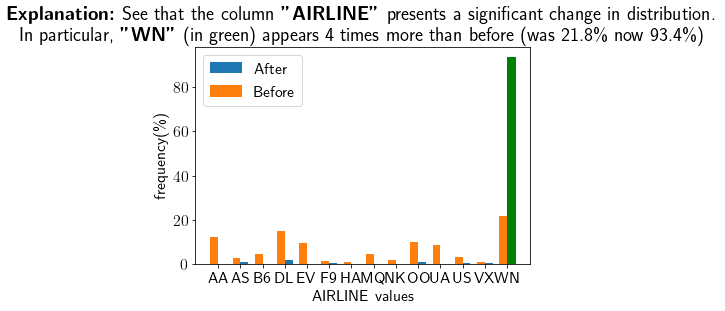

In [132]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 12, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
14,14,2015,2,9,1,UA,1545,N26226,DFW,IAH,530,523.0,-7.0,10.0,533.0,68.0,56.0,40.0,224,613.0,6.0,638,619.0,-19.0,13
34,35,2015,3,30,1,B6,28,N629JB,MCO,EWR,905,901.0,-4.0,14.0,915.0,155.0,142.0,123.0,937,1118.0,5.0,1140,1123.0,-17.0,13
45,46,2015,10,11,7,DL,1574,N900PC,13204,13487,800,800.0,0.0,15.0,815.0,207.0,195.0,177.0,1310,1012.0,3.0,1027,1015.0,-12.0,13
63,64,2015,5,11,1,AS,679,N527AS,DEN,SEA,800,754.0,-6.0,22.0,816.0,164.0,178.0,150.0,1024,946.0,6.0,944,952.0,8.0,13
81,83,2015,12,29,2,AA,195,N348AA,MIA,MCO,939,947.0,8.0,10.0,957.0,69.0,54.0,39.0,192,1036.0,5.0,1048,1041.0,-7.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49054,49959,2015,4,14,2,NK,872,N606NK,OAK,ORD,850,843.0,-7.0,8.0,851.0,245.0,237.0,216.0,1836,1427.0,13.0,1455,1440.0,-15.0,13
49074,49981,2015,12,16,3,AA,347,N3KTAA,MSY,MIA,600,556.0,-4.0,19.0,615.0,111.0,118.0,90.0,675,845.0,9.0,851,854.0,3.0,13
49080,49987,2015,12,24,4,AA,1620,N581AA,DFW,DEN,905,902.0,-3.0,25.0,927.0,129.0,130.0,98.0,641,1005.0,7.0,1014,1012.0,-2.0,13
49087,49994,2015,1,18,7,AA,1367,N578AA,TPA,DFW,853,850.0,-3.0,26.0,916.0,172.0,182.0,150.0,929,1046.0,6.0,1045,1052.0,7.0,13


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
14,14,2015,2,9,1,UA,1545,N26226,DFW,IAH,530,523.0,-7.0,10.0,533.0,68.0,56.0,40.0,224,613.0,6.0,638,619.0,-19.0,13
34,35,2015,3,30,1,B6,28,N629JB,MCO,EWR,905,901.0,-4.0,14.0,915.0,155.0,142.0,123.0,937,1118.0,5.0,1140,1123.0,-17.0,13
45,46,2015,10,11,7,DL,1574,N900PC,13204,13487,800,800.0,0.0,15.0,815.0,207.0,195.0,177.0,1310,1012.0,3.0,1027,1015.0,-12.0,13
63,64,2015,5,11,1,AS,679,N527AS,DEN,SEA,800,754.0,-6.0,22.0,816.0,164.0,178.0,150.0,1024,946.0,6.0,944,952.0,8.0,13
81,83,2015,12,29,2,AA,195,N348AA,MIA,MCO,939,947.0,8.0,10.0,957.0,69.0,54.0,39.0,192,1036.0,5.0,1048,1041.0,-7.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49054,49959,2015,4,14,2,NK,872,N606NK,OAK,ORD,850,843.0,-7.0,8.0,851.0,245.0,237.0,216.0,1836,1427.0,13.0,1455,1440.0,-15.0,13
49074,49981,2015,12,16,3,AA,347,N3KTAA,MSY,MIA,600,556.0,-4.0,19.0,615.0,111.0,118.0,90.0,675,845.0,9.0,851,854.0,3.0,13
49080,49987,2015,12,24,4,AA,1620,N581AA,DFW,DEN,905,902.0,-3.0,25.0,927.0,129.0,130.0,98.0,641,1005.0,7.0,1014,1012.0,-2.0,13
49087,49994,2015,1,18,7,AA,1367,N578AA,TPA,DFW,853,850.0,-3.0,26.0,916.0,172.0,182.0,150.0,929,1046.0,6.0,1045,1052.0,7.0,13


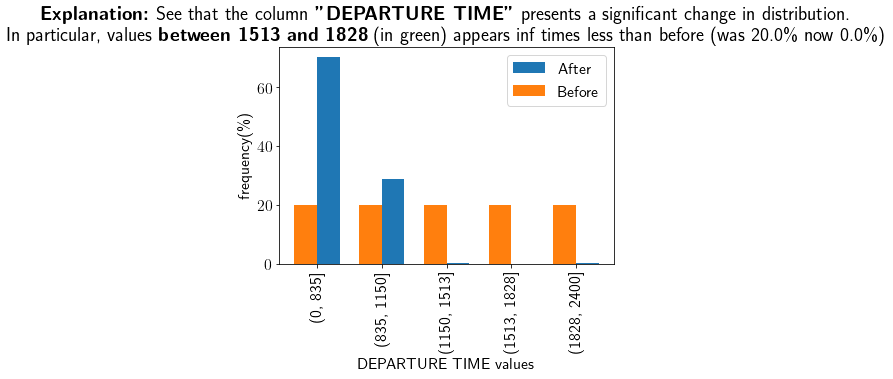

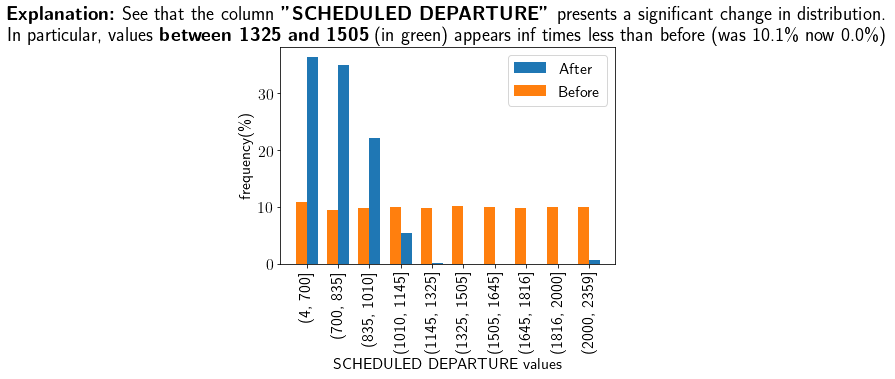

In [133]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 13, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
5,5,2015,9,27,7,DL,1612,N927AT,ATL,ORD,1345,1342.0,-3.0,14.0,1356.0,130.0,106.0,86.0,606,1422.0,6.0,1455,1428.0,-27.0,14
39,40,2015,10,5,1,DL,158,N975AT,11433,10721,1207,1203.0,-4.0,13.0,1216.0,118.0,109.0,89.0,632,1345.0,7.0,1405,1352.0,-13.0,14
60,61,2015,1,26,1,US,2018,N157UW,CLT,RSW,1150,1150.0,0.0,19.0,1209.0,120.0,117.0,92.0,600,1341.0,6.0,1350,1347.0,-3.0,14
115,117,2015,11,19,4,AA,1373,N4WNAA,DFW,JAX,1155,1149.0,-6.0,11.0,1200.0,139.0,128.0,112.0,918,1452.0,5.0,1514,1457.0,-17.0,14
118,120,2015,11,14,6,DL,1656,N969AT,ATL,GPT,1529,1526.0,-3.0,11.0,1537.0,84.0,68.0,53.0,352,1530.0,4.0,1553,1534.0,-19.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49041,49946,2015,4,27,1,DL,1814,N903DA,ATL,PNS,1501,1456.0,-5.0,25.0,1521.0,78.0,78.0,49.0,271,1510.0,4.0,1519,1514.0,-5.0,14
49043,49948,2015,3,23,1,AA,2323,N492AA,DFW,OMA,1605,1600.0,-5.0,14.0,1614.0,104.0,100.0,83.0,583,1737.0,3.0,1749,1740.0,-9.0,14
49076,49983,2015,5,3,7,US,489,N749US,PHX,PIT,859,900.0,1.0,19.0,919.0,248.0,248.0,224.0,1814,1603.0,5.0,1607,1608.0,1.0,14
49084,49991,2015,5,9,6,US,1806,N174US,ORD,CLT,1355,1350.0,-5.0,13.0,1403.0,123.0,108.0,86.0,599,1629.0,9.0,1658,1638.0,-20.0,14


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
5,5,2015,9,27,7,DL,1612,N927AT,ATL,ORD,1345,1342.0,-3.0,14.0,1356.0,130.0,106.0,86.0,606,1422.0,6.0,1455,1428.0,-27.0,14
39,40,2015,10,5,1,DL,158,N975AT,11433,10721,1207,1203.0,-4.0,13.0,1216.0,118.0,109.0,89.0,632,1345.0,7.0,1405,1352.0,-13.0,14
60,61,2015,1,26,1,US,2018,N157UW,CLT,RSW,1150,1150.0,0.0,19.0,1209.0,120.0,117.0,92.0,600,1341.0,6.0,1350,1347.0,-3.0,14
115,117,2015,11,19,4,AA,1373,N4WNAA,DFW,JAX,1155,1149.0,-6.0,11.0,1200.0,139.0,128.0,112.0,918,1452.0,5.0,1514,1457.0,-17.0,14
118,120,2015,11,14,6,DL,1656,N969AT,ATL,GPT,1529,1526.0,-3.0,11.0,1537.0,84.0,68.0,53.0,352,1530.0,4.0,1553,1534.0,-19.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49041,49946,2015,4,27,1,DL,1814,N903DA,ATL,PNS,1501,1456.0,-5.0,25.0,1521.0,78.0,78.0,49.0,271,1510.0,4.0,1519,1514.0,-5.0,14
49043,49948,2015,3,23,1,AA,2323,N492AA,DFW,OMA,1605,1600.0,-5.0,14.0,1614.0,104.0,100.0,83.0,583,1737.0,3.0,1749,1740.0,-9.0,14
49076,49983,2015,5,3,7,US,489,N749US,PHX,PIT,859,900.0,1.0,19.0,919.0,248.0,248.0,224.0,1814,1603.0,5.0,1607,1608.0,1.0,14
49084,49991,2015,5,9,6,US,1806,N174US,ORD,CLT,1355,1350.0,-5.0,13.0,1403.0,123.0,108.0,86.0,599,1629.0,9.0,1658,1638.0,-20.0,14


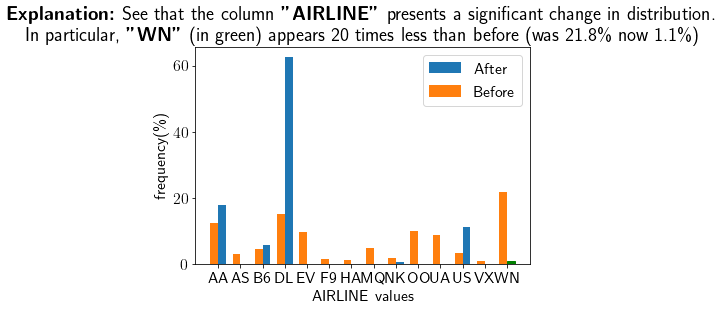

In [134]:
filter_(clustered_flights.dropna(), "Flights", "cluster", "==", 14, ignore={})

# Explaining Using DBSCAN

In [9]:
clusters = DBSCAN(eps=3, min_samples=5).fit(flights_embeddings).labels_

In [10]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
from sklearn.metrics import pairwise_distances

In [158]:
dist_matrix = pairwise_distances(flights_embeddings)

In [159]:
dist_matrix

array([[0.00000000e+00, 1.71698389e+00, 1.69685893e+00, ...,
        1.78640278e+00, 1.67015933e+00, 1.72590771e+00],
       [1.71698389e+00, 0.00000000e+00, 1.83516447e+00, ...,
        1.98953297e+00, 1.72264235e+00, 2.10363793e+00],
       [1.69685893e+00, 1.83516447e+00, 0.00000000e+00, ...,
        2.07027003e+00, 1.96852342e+00, 1.88738974e+00],
       ...,
       [1.78640278e+00, 1.98953297e+00, 2.07027003e+00, ...,
        2.98023224e-08, 1.28923417e+00, 9.04299257e-01],
       [1.67015933e+00, 1.72264235e+00, 1.96852342e+00, ...,
        1.28923417e+00, 0.00000000e+00, 1.60108315e+00],
       [1.72590771e+00, 2.10363793e+00, 1.88738974e+00, ...,
        9.04299257e-01, 1.60108315e+00, 2.98023224e-08]])

## Comparison to Naive clustering on raw dataset

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
categorical_columns = ['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

In [32]:
numerical_columns = [column for column in list(flights.columns) if column not in categorical_columns]

In [35]:
flights_categorical = flights[categorical_columns]
flights_numerical = flights[numerical_columns]

In [41]:
ohe_flights = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(flights_categorical)).join(flights_numerical)

In [44]:
ohe_clusters = KMeans(n_clusters=8, random_state=0).fit_predict(ohe_flights.dropna())

In [45]:
clustered_ohe_flights = flights.join(pd.DataFrame(data=ohe_clusters, columns=['cluster']))

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
12,12,2015,1,15,4,OO,6416,N779SK,SFO,ABQ,1052,1042.0,-10.0,17.0,1059.0,139.0,140.0,118.0,896,1357.0,5.0,1411,1402.0,-9.0,0.0
21,21,2015,5,31,7,OO,6383,N719SK,SLC,SFO,1345,1336.0,-9.0,11.0,1347.0,127.0,116.0,102.0,599,1429.0,3.0,1452,1432.0,-20.0,0.0
28,29,2015,4,20,1,DL,2531,N686DA,SLC,ATL,700,652.0,-8.0,14.0,706.0,212.0,200.0,181.0,1590,1207.0,5.0,1232,1212.0,-20.0,0.0
41,42,2015,7,29,3,UA,461,N428UA,DEN,IAD,1252,1252.0,0.0,10.0,1302.0,206.0,180.0,165.0,1452,1747.0,5.0,1818,1752.0,-26.0,0.0
45,46,2015,10,11,7,DL,1574,N900PC,13204,13487,800,800.0,0.0,15.0,815.0,207.0,195.0,177.0,1310,1012.0,3.0,1027,1015.0,-12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48175,49066,2015,10,28,3,EV,5220,N676CA,12266,13487,1529,1544.0,15.0,23.0,1607.0,165.0,179.0,150.0,1034,1837.0,6.0,1814,1843.0,29.0,0.0
48176,49067,2015,4,12,7,B6,1502,N746JB,FLL,JFK,635,626.0,-9.0,17.0,643.0,169.0,165.0,142.0,1069,905.0,6.0,924,911.0,-13.0,0.0
48186,49077,2015,8,28,5,OO,7383,N438SW,SLC,CPR,1112,1106.0,-6.0,25.0,1131.0,75.0,81.0,52.0,320,1223.0,4.0,1227,1227.0,0.0,0.0
48188,49079,2015,1,20,2,EV,3955,N15973,IAH,JAN,1630,1624.0,-6.0,10.0,1634.0,76.0,65.0,49.0,351,1723.0,6.0,1746,1729.0,-17.0,0.0


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
12,12,2015,1,15,4,OO,6416,N779SK,SFO,ABQ,1052,1042.0,-10.0,17.0,1059.0,139.0,140.0,118.0,896,1357.0,5.0,1411,1402.0,-9.0,0.0
21,21,2015,5,31,7,OO,6383,N719SK,SLC,SFO,1345,1336.0,-9.0,11.0,1347.0,127.0,116.0,102.0,599,1429.0,3.0,1452,1432.0,-20.0,0.0
28,29,2015,4,20,1,DL,2531,N686DA,SLC,ATL,700,652.0,-8.0,14.0,706.0,212.0,200.0,181.0,1590,1207.0,5.0,1232,1212.0,-20.0,0.0
41,42,2015,7,29,3,UA,461,N428UA,DEN,IAD,1252,1252.0,0.0,10.0,1302.0,206.0,180.0,165.0,1452,1747.0,5.0,1818,1752.0,-26.0,0.0
45,46,2015,10,11,7,DL,1574,N900PC,13204,13487,800,800.0,0.0,15.0,815.0,207.0,195.0,177.0,1310,1012.0,3.0,1027,1015.0,-12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48175,49066,2015,10,28,3,EV,5220,N676CA,12266,13487,1529,1544.0,15.0,23.0,1607.0,165.0,179.0,150.0,1034,1837.0,6.0,1814,1843.0,29.0,0.0
48176,49067,2015,4,12,7,B6,1502,N746JB,FLL,JFK,635,626.0,-9.0,17.0,643.0,169.0,165.0,142.0,1069,905.0,6.0,924,911.0,-13.0,0.0
48186,49077,2015,8,28,5,OO,7383,N438SW,SLC,CPR,1112,1106.0,-6.0,25.0,1131.0,75.0,81.0,52.0,320,1223.0,4.0,1227,1227.0,0.0,0.0
48188,49079,2015,1,20,2,EV,3955,N15973,IAH,JAN,1630,1624.0,-6.0,10.0,1634.0,76.0,65.0,49.0,351,1723.0,6.0,1746,1729.0,-17.0,0.0


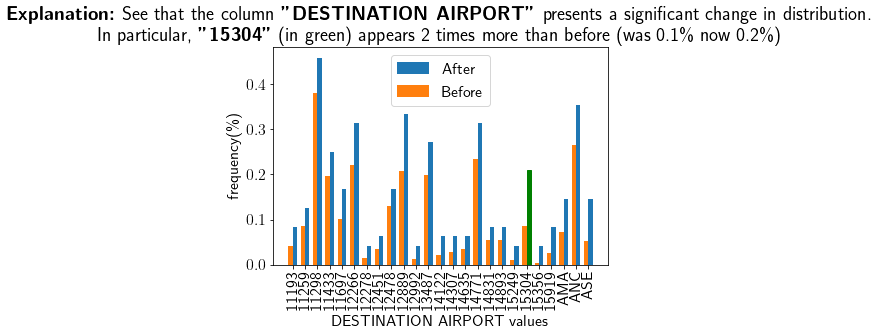

In [46]:
filter_(clustered_ohe_flights.dropna(), "Flights OHE", "cluster", "==", 0, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
4,4,2015,8,24,1,MQ,3381,N694MQ,MOB,DFW,1910,1922.0,12.0,8.0,1930.0,110.0,107.0,83.0,539,2053.0,16.0,2100,2109.0,9.0,1.0
8,8,2015,4,17,5,DL,2394,N926DL,ATL,PHL,1735,1730.0,-5.0,12.0,1742.0,129.0,115.0,99.0,666,1921.0,4.0,1944,1925.0,-19.0,1.0
9,9,2015,12,17,4,WN,1839,N784SW,MCO,ALB,2055,2117.0,22.0,10.0,2127.0,160.0,138.0,125.0,1073,2332.0,3.0,2335,2335.0,0.0,1.0
24,24,2015,12,12,6,MQ,3091,N658MQ,ORD,CMI,1516,1511.0,-5.0,16.0,1527.0,57.0,47.0,29.0,135,1556.0,2.0,1613,1558.0,-15.0,1.0
32,33,2015,12,4,5,DL,864,N923DN,MSP,MSN,2149,2145.0,-4.0,11.0,2156.0,65.0,50.0,37.0,228,2233.0,2.0,2254,2235.0,-19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48171,49062,2015,7,19,7,WN,6262,N908WN,DTW,PHX,650,649.0,-1.0,11.0,700.0,250.0,248.0,228.0,1671,748.0,9.0,800,757.0,-3.0,1.0
48172,49063,2015,2,28,6,WN,4394,N633SW,ELP,PHX,1425,1422.0,-3.0,13.0,1435.0,75.0,77.0,59.0,347,1534.0,5.0,1540,1539.0,-1.0,1.0
48173,49064,2015,11,7,6,AA,112,N3CBAA,MCO,MIA,1630,1650.0,20.0,15.0,1705.0,69.0,62.0,41.0,192,1746.0,6.0,1739,1752.0,13.0,1.0
48193,49084,2015,7,11,6,AA,819,N123UW,TPA,CLT,700,652.0,-8.0,10.0,702.0,102.0,94.0,78.0,507,820.0,6.0,842,826.0,-16.0,1.0


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
4,4,2015,8,24,1,MQ,3381,N694MQ,MOB,DFW,1910,1922.0,12.0,8.0,1930.0,110.0,107.0,83.0,539,2053.0,16.0,2100,2109.0,9.0,1.0
8,8,2015,4,17,5,DL,2394,N926DL,ATL,PHL,1735,1730.0,-5.0,12.0,1742.0,129.0,115.0,99.0,666,1921.0,4.0,1944,1925.0,-19.0,1.0
9,9,2015,12,17,4,WN,1839,N784SW,MCO,ALB,2055,2117.0,22.0,10.0,2127.0,160.0,138.0,125.0,1073,2332.0,3.0,2335,2335.0,0.0,1.0
24,24,2015,12,12,6,MQ,3091,N658MQ,ORD,CMI,1516,1511.0,-5.0,16.0,1527.0,57.0,47.0,29.0,135,1556.0,2.0,1613,1558.0,-15.0,1.0
32,33,2015,12,4,5,DL,864,N923DN,MSP,MSN,2149,2145.0,-4.0,11.0,2156.0,65.0,50.0,37.0,228,2233.0,2.0,2254,2235.0,-19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48171,49062,2015,7,19,7,WN,6262,N908WN,DTW,PHX,650,649.0,-1.0,11.0,700.0,250.0,248.0,228.0,1671,748.0,9.0,800,757.0,-3.0,1.0
48172,49063,2015,2,28,6,WN,4394,N633SW,ELP,PHX,1425,1422.0,-3.0,13.0,1435.0,75.0,77.0,59.0,347,1534.0,5.0,1540,1539.0,-1.0,1.0
48173,49064,2015,11,7,6,AA,112,N3CBAA,MCO,MIA,1630,1650.0,20.0,15.0,1705.0,69.0,62.0,41.0,192,1746.0,6.0,1739,1752.0,13.0,1.0
48193,49084,2015,7,11,6,AA,819,N123UW,TPA,CLT,700,652.0,-8.0,10.0,702.0,102.0,94.0,78.0,507,820.0,6.0,842,826.0,-16.0,1.0


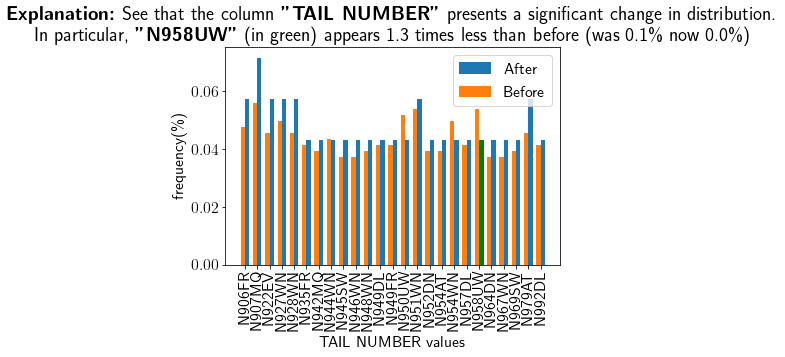

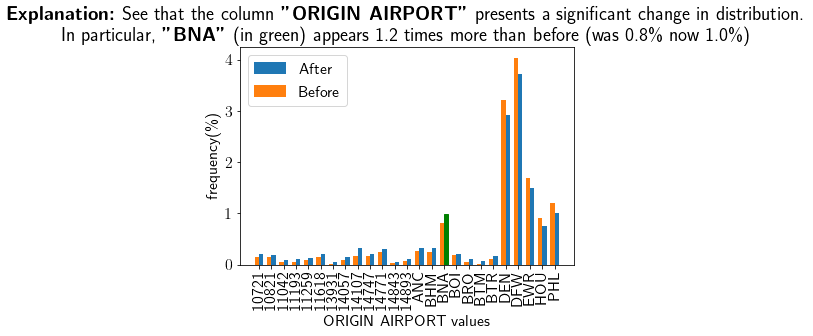

In [47]:
filter_(clustered_ohe_flights.dropna(), "Flights OHE", "cluster", "==", 1, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
3,3,2015,2,11,3,UA,1578,N37409,IAH,BOS,1559,1624.0,25.0,13.0,1637.0,218.0,203.0,178.0,1597,2035.0,12.0,2037,2047.0,10.0,2.0
10,10,2015,9,13,7,WN,238,N493WN,LAX,LAS,2015,2023.0,8.0,15.0,2038.0,60.0,66.0,45.0,236,2123.0,6.0,2115,2129.0,14.0,2.0
15,15,2015,2,25,3,F9,1275,N204FR,PHL,MIA,1650,1706.0,16.0,13.0,1719.0,175.0,167.0,148.0,1013,1947.0,6.0,1945,1953.0,8.0,2.0
17,17,2015,8,31,1,DL,788,N958DL,ATL,OKC,2104,2059.0,-5.0,18.0,2117.0,134.0,127.0,105.0,761,2202.0,4.0,2218,2206.0,-12.0,2.0
18,18,2015,8,19,3,WN,434,N8627B,DCA,AUS,1745,1740.0,-5.0,16.0,1756.0,210.0,204.0,183.0,1315,1959.0,5.0,2015,2004.0,-11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48151,49042,2015,3,27,5,WN,794,N262WN,MDW,DEN,1930,1935.0,5.0,10.0,1945.0,160.0,140.0,121.0,895,2046.0,9.0,2110,2055.0,-15.0,2.0
48167,49058,2015,12,4,5,EV,6126,N13132,ELM,ORD,1715,1737.0,22.0,9.0,1746.0,124.0,103.0,82.0,566,1808.0,12.0,1819,1820.0,1.0,2.0
48181,49072,2015,1,3,6,DL,1866,N810DN,SFO,ATL,615,617.0,2.0,34.0,651.0,270.0,296.0,254.0,2139,1405.0,8.0,1345,1413.0,28.0,2.0
48191,49082,2015,8,6,4,DL,1727,N975AT,BNA,DTW,1355,1352.0,-3.0,9.0,1401.0,93.0,84.0,66.0,456,1607.0,9.0,1628,1616.0,-12.0,2.0


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
3,3,2015,2,11,3,UA,1578,N37409,IAH,BOS,1559,1624.0,25.0,13.0,1637.0,218.0,203.0,178.0,1597,2035.0,12.0,2037,2047.0,10.0,2.0
10,10,2015,9,13,7,WN,238,N493WN,LAX,LAS,2015,2023.0,8.0,15.0,2038.0,60.0,66.0,45.0,236,2123.0,6.0,2115,2129.0,14.0,2.0
15,15,2015,2,25,3,F9,1275,N204FR,PHL,MIA,1650,1706.0,16.0,13.0,1719.0,175.0,167.0,148.0,1013,1947.0,6.0,1945,1953.0,8.0,2.0
17,17,2015,8,31,1,DL,788,N958DL,ATL,OKC,2104,2059.0,-5.0,18.0,2117.0,134.0,127.0,105.0,761,2202.0,4.0,2218,2206.0,-12.0,2.0
18,18,2015,8,19,3,WN,434,N8627B,DCA,AUS,1745,1740.0,-5.0,16.0,1756.0,210.0,204.0,183.0,1315,1959.0,5.0,2015,2004.0,-11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48151,49042,2015,3,27,5,WN,794,N262WN,MDW,DEN,1930,1935.0,5.0,10.0,1945.0,160.0,140.0,121.0,895,2046.0,9.0,2110,2055.0,-15.0,2.0
48167,49058,2015,12,4,5,EV,6126,N13132,ELM,ORD,1715,1737.0,22.0,9.0,1746.0,124.0,103.0,82.0,566,1808.0,12.0,1819,1820.0,1.0,2.0
48181,49072,2015,1,3,6,DL,1866,N810DN,SFO,ATL,615,617.0,2.0,34.0,651.0,270.0,296.0,254.0,2139,1405.0,8.0,1345,1413.0,28.0,2.0
48191,49082,2015,8,6,4,DL,1727,N975AT,BNA,DTW,1355,1352.0,-3.0,9.0,1401.0,93.0,84.0,66.0,456,1607.0,9.0,1628,1616.0,-12.0,2.0


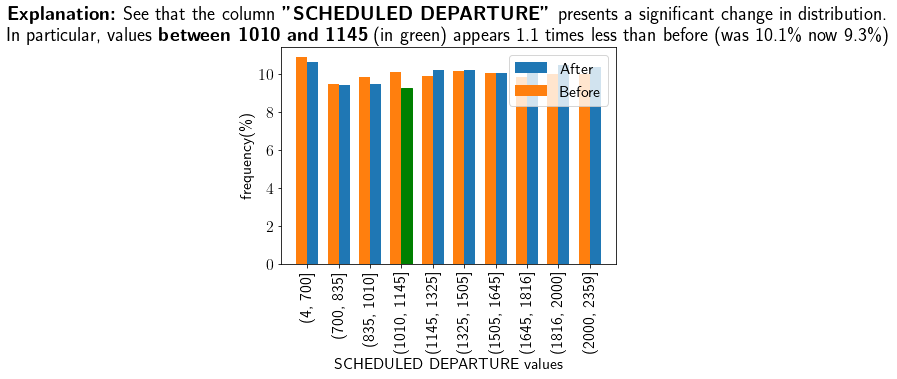

In [48]:
filter_(clustered_ohe_flights.dropna(), "Flights OHE", "cluster", "==", 2, ignore={})

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
1,1,2015,2,15,7,OO,4760,N629BR,SLC,GTF,2002,1955.0,-7.0,26.0,2021.0,100.0,105.0,76.0,463,2137.0,3.0,2142,2140.0,-2.0,4.0
13,13,2015,5,19,2,EV,4538,N13979,GRR,EWR,2016,2037.0,21.0,12.0,2049.0,117.0,101.0,81.0,605,2210.0,8.0,2213,2218.0,5.0,4.0
20,20,2015,10,22,4,EV,4415,N11547,13930,11775,2230,2221.0,-9.0,14.0,2235.0,100.0,88.0,69.0,462,2344.0,5.0,10,2349.0,-21.0,4.0
26,27,2015,4,18,6,MQ,2937,N696MQ,BHM,MIA,1245,1237.0,-8.0,9.0,1246.0,113.0,106.0,92.0,661,1518.0,5.0,1538,1523.0,-15.0,4.0
30,31,2015,8,20,4,OO,2891,N464SW,LAX,SMF,800,801.0,1.0,27.0,828.0,93.0,94.0,61.0,373,929.0,6.0,933,935.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48165,49056,2015,8,5,3,B6,801,N729JB,MCO,SLC,1837,1925.0,48.0,21.0,1946.0,272.0,282.0,254.0,1931,2200.0,7.0,2109,2207.0,58.0,4.0
48180,49071,2015,7,28,2,EV,2721,N680AE,TYS,ORD,633,639.0,6.0,7.0,646.0,110.0,112.0,77.0,475,703.0,28.0,723,731.0,8.0,4.0
48182,49073,2015,10,9,5,WN,176,N654SW,11259,10423,1430,1443.0,13.0,11.0,1454.0,50.0,52.0,37.0,189,1531.0,4.0,1520,1535.0,15.0,4.0
48184,49075,2015,8,14,5,DL,1558,N842DN,TPA,LAX,621,615.0,-6.0,9.0,624.0,299.0,294.0,258.0,2158,742.0,27.0,820,809.0,-11.0,4.0


,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,cluster
1,1,2015,2,15,7,OO,4760,N629BR,SLC,GTF,2002,1955.0,-7.0,26.0,2021.0,100.0,105.0,76.0,463,2137.0,3.0,2142,2140.0,-2.0,4.0
13,13,2015,5,19,2,EV,4538,N13979,GRR,EWR,2016,2037.0,21.0,12.0,2049.0,117.0,101.0,81.0,605,2210.0,8.0,2213,2218.0,5.0,4.0
20,20,2015,10,22,4,EV,4415,N11547,13930,11775,2230,2221.0,-9.0,14.0,2235.0,100.0,88.0,69.0,462,2344.0,5.0,10,2349.0,-21.0,4.0
26,27,2015,4,18,6,MQ,2937,N696MQ,BHM,MIA,1245,1237.0,-8.0,9.0,1246.0,113.0,106.0,92.0,661,1518.0,5.0,1538,1523.0,-15.0,4.0
30,31,2015,8,20,4,OO,2891,N464SW,LAX,SMF,800,801.0,1.0,27.0,828.0,93.0,94.0,61.0,373,929.0,6.0,933,935.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48165,49056,2015,8,5,3,B6,801,N729JB,MCO,SLC,1837,1925.0,48.0,21.0,1946.0,272.0,282.0,254.0,1931,2200.0,7.0,2109,2207.0,58.0,4.0
48180,49071,2015,7,28,2,EV,2721,N680AE,TYS,ORD,633,639.0,6.0,7.0,646.0,110.0,112.0,77.0,475,703.0,28.0,723,731.0,8.0,4.0
48182,49073,2015,10,9,5,WN,176,N654SW,11259,10423,1430,1443.0,13.0,11.0,1454.0,50.0,52.0,37.0,189,1531.0,4.0,1520,1535.0,15.0,4.0
48184,49075,2015,8,14,5,DL,1558,N842DN,TPA,LAX,621,615.0,-6.0,9.0,624.0,299.0,294.0,258.0,2158,742.0,27.0,820,809.0,-11.0,4.0


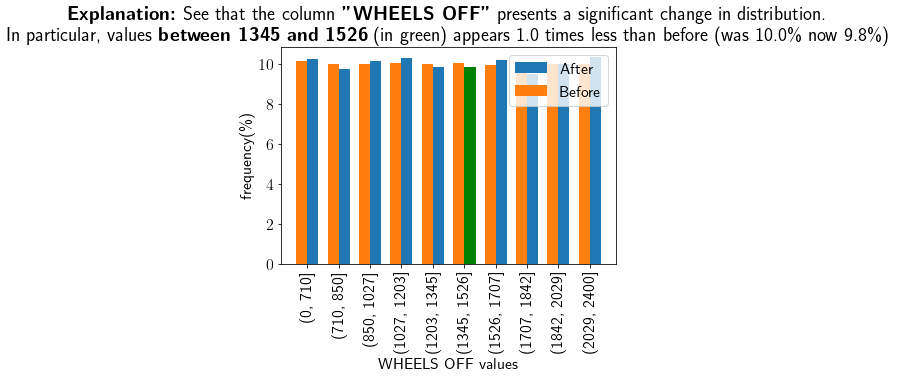

In [49]:
filter_(clustered_ohe_flights.dropna(), "Flights OHE", "cluster", "==", 4, ignore={})